<a href="https://colab.research.google.com/github/VolodymyrKokhan/Activities-of-an-international-company-/blob/main/Python_Project_Volodymyr_Kokhan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***This project covers the activities of an international company over 7 years. The project includes a complete cycle, from loading and cleaning data to forming analytical conclusions. A full analysis and visualization of key metrics, sales dynamics, and metrics analysis by countries, channels, categories, etc., are conducted. Based on the analysis, a dashboard with key visualizations was created.***

***Цей проєкт охоплює діяльність міжнародної компанії за 7 років. Проєкт включає повний цикл роботи, від завантаження та очищення даних до формування аналітичних висновків. Проводиться повний аналіз та візуалізація основних метрик, динаміки продажів, аналіз метрик у розрізі країн, каналів, категорій тощо. На основі аналізу створено дашборд з основними візуалізаціями.***

# **Import libraries and connecting to Google Drive**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# **Data overview**

## **Loading the dataset, describing the columns**

In [4]:
%cd /content/drive/MyDrive/Mate/Python\ for\ Data\ Analytics/datasets/Final\ project
events_data = pd.read_csv("events.csv")
events_data.info()
events_data.head()

/content/drive/MyDrive/Mate/Python for Data Analytics/datasets/Final project
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79

`events_data` - main table

***Column Descriptions:***

0 `Order ID` - Order ID in the format "100640618"

1 `Order Date` - Order placement date in the format "10/8/2014"

2 `Ship Date` - Order shipment date in the format "10/8/2014"

3 `Order Priority` - Order priority

4 `Country Code` - Abbreviated country code in the format "NOR"

5 `Product ID` - Product category ID

6 `Sales Channel` - Sales channel

7 `Units Sold` - Number of units sold

8 `Unit Price` - Price per unit

9 `Unit Cost` - Cost per unit

In [5]:
products_data = pd.read_csv("products.csv")
products_data.info()
products_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies

`products_data` - product categories table

***Column Descriptions:***

0 `id` - Product category ID

1 `item_type` - Product category name

In [6]:
countries_data = pd.read_csv("countries.csv")
countries_data.info()
countries_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Åland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

`countries_data` - countries table

***Column Descriptions:***

0 `name` - Country Name

1 `alpha-2` - Country code in "AF" format

2 `alpha-3` - Country code in "AFG" format

3 `region` - Continent/part of the world

4 `sub-region `- Geographical region of the country's location

## **Key fields that connect the tables**

To join the `events_data` and `products_data` tables, the `Product ID` field is used. In the `events_data` table, it is called `Product ID`, and in the `products_data` table, it is `id`. Both of these columns represent the product category identifier.

`events_data[Product ID] = products_data[id]`

To join the `events_data` and `countries_data` tables, the `Country Code` field is used. In the `events_data` table, this field is called `Country Code`, and in `countries_data`, it is `alpha-3`. Both columns contain the abbreviated three-letter country code.

`events_data[Country Code] = countries_data[alpha-3]`

# **Data cleaning**

## **Working with missing values**

### `events_data`

In [7]:
#Checking for missing values
print("Missing values on events_data")
print(events_data.isna().sum())
print("\n")
print("Percentage of missing values")
#Percentage of missing values
print(events_data.isna().sum() / events_data.shape[0] * 100)


Missing values on events_data
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64


Percentage of missing values
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


Missing values in the `Country Code` column will be filled with the word `UNKNOWN` so they can be included in the general analysis but excluded from the country-specific analysis.

Missing values in the `Units Sold` column will be filled with the median value for each `Product ID` and `country`.

In [8]:
#Creating a copy of the dataset to make changes
events_data_cleaned = events_data.copy()

events_data_cleaned['Country Code'] = events_data_cleaned['Country Code'].fillna('UNKNOWN')

#transform() applies a function to each group, but returns a result that has the same shape as the original column.
#lambda x: x.fillna(x.median()) is the simplest way to say: "For each group (x), find its median (x.median()) and fill the missing values (x.fillna()) with it
events_data_cleaned['Units Sold'] = events_data_cleaned.groupby(['Product ID', 'Country Code'])['Units Sold'].transform(lambda x: x.fillna(x.median()))

print("Missing values on events_data_cleaned")
print(events_data_cleaned.isna().sum())

Missing values on events_data_cleaned
Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


### `products_data`

In [9]:
#Checking for missing values
print("Missing values on products_data")
print(products_data.isna().sum())
print("\n")
print("Percentage of missing values")
#Percentage of missing values
print(products_data.isna().sum() / products_data.shape[0] * 100)


Missing values on products_data
id           0
item_type    0
dtype: int64


Percentage of missing values
id           0.0
item_type    0.0
dtype: float64


There are no missing values, no further processing is required.

### `countries_data`

In [10]:
#Checking for missing values
print("Missing values on countries_data")
print(countries_data.isna().sum())
print("\n")
print("Percentage of missing values")
#Percentage of missing values
print(countries_data.isna().sum() / countries_data.shape[0] * 100)

Missing values on countries_data
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64


Percentage of missing values
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


There are a few missing values that will be filled with information from a search. First, we will find the rows with missing values.

In [11]:
countries_data[countries_data.isna().any(axis=1)]

name alpha-2 alpha-3  region          sub-region
8    Antarctica      AQ     ATA     NaN                 NaN
153     Namibia     NaN     NAM  Africa  Sub-Saharan Africa

The `alpha-2` code for Namibia is `'NA'`, which Python perceives as a missing value. This can be fixed at the loading stage by specifying all standard missing value options except `'NA'`, but since this column will not be needed for further work with this DataFrame, we will not process it.

In [12]:
#Creating a copy of the dataset to make changes
countries_data_cleaned = countries_data.copy()
countries_data_cleaned.loc[8, ['region', 'sub-region']] = ['Antarctic', 'Southern Ocean']
print("Missing values on countries_data_cleaned")
print(countries_data_cleaned.isna().sum())

Missing values on countries_data_cleaned
name          0
alpha-2       1
alpha-3       0
region        0
sub-region    0
dtype: int64


## **Checking data types and their conversion**

### `events_data`

In [13]:
print("Datatypes of events_data")
events_data_cleaned.dtypes

Datatypes of events_data


Order ID            int64
Order Date         object
Ship Date          object
Order Priority     object
Country Code       object
Product ID          int64
Sales Channel      object
Units Sold        float64
Unit Price        float64
Unit Cost         float64
dtype: object

The columns `Order Date` and `Ship Date` have an `object` format instead of a `datetime`. The `Order ID` and `Product ID` columns have the `int64` data type. They won't be used for aggregations; however, let's not change its format, as the `int` format uses less memory and allows for faster operations (such as counting the total number or merging table). All other columns have the correct data type. Let's convert the date columns to a date format.

In [14]:
events_data_cleaned['Order Date'] = pd.to_datetime(events_data_cleaned['Order Date'])
events_data_cleaned['Ship Date'] = pd.to_datetime(events_data_cleaned['Ship Date'])

print(events_data_cleaned.dtypes)
events_data_cleaned.head()

Order ID                   int64
Order Date        datetime64[ns]
Ship Date         datetime64[ns]
Order Priority            object
Country Code              object
Product ID                 int64
Sales Channel             object
Units Sold               float64
Unit Price               float64
Unit Cost                float64
dtype: object


Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M      UNKNOWN        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79

### `products_data`

In [15]:
products_data.dtypes

id            int64
item_type    object
dtype: object

 The `id` column has the `int64` data type. It won't be used for aggregations; however, let's not change its format, as the `int` format uses less memory and allows for faster operations (such as counting the total number or merging table). Column `item_type` is in ncorrect format, no further processing is required.

### `countries_data`

In [16]:
countries_data_cleaned.dtypes

name          object
alpha-2       object
alpha-3       object
region        object
sub-region    object
dtype: object

There are no incorrect formats, no further processing is required.

## **Studying data for duplicates and removing them**

### `events_data`

To check for duplicates, let's first standardize the data in each object-type column into a single format and remove extra spaces. Additionally, let's install the unidecode library and convert all letters to Latin characters.

In [17]:
!pip install unidecode
from unidecode import unidecode

#Converting columns to uppercase and removing extra spaces. apply(unidecode) to convert all letters to Latin characters
events_data_cleaned['Order Priority'] = events_data_cleaned['Order Priority'].apply(unidecode).str.strip().str.upper()
events_data_cleaned['Country Code'] = events_data_cleaned['Country Code'].apply(unidecode).str.strip().str.upper()

#Converting only the first character of the string to uppercase and all others to lowercase, and removing extra spaces. apply(unidecode) to convert all letters to Latin characters
events_data_cleaned['Sales Channel'] = events_data_cleaned['Sales Channel'].apply(unidecode).str.strip().str.capitalize()
events_data_cleaned.head()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 4.9 MB/s eta 0:00:00


Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M      UNKNOWN        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79

Checking for duplicates

In [18]:
events_duplicate_rows = events_data_cleaned.duplicated()
print(events_duplicate_rows)
print(f'\nNumber of dublicated rows in events_data: {events_duplicate_rows.sum()}')

0       False
1       False
2       False
3       False
4       False
        ...  
1325    False
1326    False
1327    False
1328    False
1329    False
Length: 1330, dtype: bool

Number of dublicated rows in events_data: 0


There are no duplicates, so they do not need to be removed

### `products_data`

To check for duplicates, let's first standardize the data in each object-type column into a single format and remove extra spaces. This table has not been changed before, but now let's create a copy to make further changes. Additionally, let's convert all letters to Latin characters.

In [19]:
#Creating a copy
products_data_cleaned = products_data.copy()

#Converting only the first character of the word to uppercase and all others to lowercase, and removing extra spaces. apply(unidecode) to convert all letters to Latin characters
products_data_cleaned['item_type'] = products_data_cleaned['item_type'].apply(unidecode).str.strip().str.title()
products_data_cleaned.head()

id        item_type
0  2103           Cereal
1  7940        Household
2  2455          Clothes
3  1270        Beverages
4  8681  Office Supplies

Checking for duplicates

In [20]:
products_duplicate_rows = products_data_cleaned.duplicated()
print(products_duplicate_rows)
print(f'\nNumber of dublicated rows in products_data: {events_duplicate_rows.sum()}')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

Number of dublicated rows in products_data: 0


There are no duplicates, so they do not need to be removed

### `countries_data`

To check for duplicates, let's first standardize the data in each object-type column into a single format and remove extra spaces. Additionally, let's convert all letters to Latin characters.

In [21]:
#Converting only the first character of the word to uppercase and all others to lowercase, and removing extra spaces. apply(unidecode) to convert all letters to Latin characters
countries_data_cleaned['name'] = countries_data_cleaned['name'].apply(unidecode).str.strip().str.title()
countries_data_cleaned['region'] = countries_data_cleaned['region'].apply(unidecode).str.strip().str.title()
countries_data_cleaned['sub-region'] = countries_data_cleaned['sub-region'].apply(unidecode).str.strip().str.title()
#Converting columns to uppercase and removing extra spaces
countries_data_cleaned['alpha-2'] = countries_data_cleaned['alpha-2'].fillna('NA').apply(unidecode).str.strip().str.upper() # .fillna('NA') to work with code of Namibia ('NA'), because Python understand this like float64 'NA'
countries_data_cleaned['alpha-3'] = countries_data_cleaned['alpha-3'].apply(unidecode).str.strip().str.upper()

countries_data_cleaned.head()

name alpha-2 alpha-3   region       sub-region
0     Afghanistan      AF     AFG     Asia    Southern Asia
1   Aland Islands      AX     ALA   Europe  Northern Europe
2         Albania      AL     ALB   Europe  Southern Europe
3         Algeria      DZ     DZA   Africa  Northern Africa
4  American Samoa      AS     ASM  Oceania        Polynesia

Checking for duplicates

In [22]:
countries_duplicate_rows = countries_data_cleaned.duplicated()
print(countries_duplicate_rows)
print(f'\nNumber of dublicated rows in countries_data: {countries_duplicate_rows.sum()}')

0      False
1      False
2      False
3      False
4      False
       ...  
244    False
245    False
246    False
247    False
248    False
Length: 249, dtype: bool

Number of dublicated rows in countries_data: 0


There are no duplicates, so they do not need to be removed

## **Data anomaly detection**

### `events_data`

Checking for unusual text values

In [23]:
print(f'Unique values of Sales Channel: {events_data_cleaned['Sales Channel'].unique()}')
print(f'Unique values of Order Priority: {events_data_cleaned['Order Priority'].unique()}')
print(f'Unique values of Country Code: {events_data_cleaned['Country Code'].unique()}')

Unique values of Sales Channel: ['Online' 'Offline']
Unique values of Order Priority: ['M' 'C' 'L' 'H']
Unique values of Country Code: ['NOR' 'SRB' 'UNKNOWN' 'MNE' 'SVK' 'FRA' 'ESP' 'HRV' 'DEU' 'ARM' 'GEO'
 'GBR' 'SVN' 'ROU' 'POL' 'LUX' 'CYP' 'BEL' 'LTU' 'RUS' 'MLT' 'UKR' 'CZE'
 'PRT' 'BLR' 'EST' 'AUT' 'MKD' 'SMR' 'NLD' 'CHE' 'HUN' 'LVA' 'BGR' 'ITA'
 'IRL' 'AND' 'LIE' 'FIN' 'ALB' 'SWE' 'BIH' 'DNK' 'MCO' 'ISL' 'GRC']


No anomalous text values

Checking for outliers in numerical columns

In [24]:
events_data_cleaned.drop(columns=['Order ID', 'Product ID']).describe()

Order Date                      Ship Date  \
count                           1330                           1330   
mean   2013-10-12 06:09:12.180451072  2013-11-06 00:46:33.383458816   
min              2010-01-01 00:00:00            2010-01-10 00:00:00   
25%              2011-12-16 06:00:00            2012-01-03 00:00:00   
50%              2013-10-17 00:00:00            2013-11-09 00:00:00   
75%              2015-08-28 18:00:00            2015-10-03 18:00:00   
max              2017-07-23 00:00:00            2017-08-31 00:00:00   
std                              NaN                            NaN   

        Units Sold   Unit Price    Unit Cost  
count  1330.000000  1330.000000  1330.000000  
mean   4950.938346   264.893541   187.246812  
min       2.000000     9.330000     6.920000  
25%    2352.250000    81.730000    35.840000  
50%    4962.000000   154.060000    97.440000  
75%    7460.500000   437.200000   263.330000  
max    9999.000000   668.270000   524.960000  
std    2906.531404   217.323460   176.158873

In the `Units Sold` column, there is a very wide range of values, from 2 to 9999. However, the mean of 4962 is not significantly different from the median of 4950, which suggests that the distribution is relatively normal and the large and small values are not outliers. Additionally, we can check how many values fall into the low and high ranges and determine their percentage.

In [25]:
low_values_count = (events_data_cleaned['Units Sold'] < 200).sum()
total_rows = len(events_data_cleaned)
low_values_percent = (low_values_count / total_rows) * 100

print(f"Number of values less than 200: {low_values_count}")
print(f"Percentage of values less than 200: {round(low_values_percent, 2)}%")

high_values_count = (events_data_cleaned['Units Sold'] > 9000).sum()
high_values_percent = (high_values_count / total_rows) * 100

print(f"Number of values high than 9000: {high_values_count}")
print(f"Percentage of values high than 9000: {round(high_values_percent, 2)}%")

Number of values less than 200: 30
Percentage of values less than 200: 2.26%
Number of values high than 9000: 131
Percentage of values high than 9000: 9.85%


As we can see, the large and small values make up a significant portion of the data, and therefore are not anomalous outliers.

### `products_data`

Checking for unusual values

In [26]:
print(f'Unique values of Sales Channel: {products_data_cleaned['id'].unique()}')
print(f'Unique values of Order Priority: {products_data_cleaned['item_type'].unique()}')

Unique values of Sales Channel: [2103 7940 2455 1270 8681 4594 5988 7331 8875 8293 8969 3127]
Unique values of Order Priority: ['Cereal' 'Household' 'Clothes' 'Beverages' 'Office Supplies' 'Fruits'
 'Vegetables' 'Baby Food' 'Meat' 'Cosmetics' 'Snacks' 'Personal Care']


No anomalous values

### `countries_data`

For the countries table, we can only check for unusual text values in the columns `region` and `sub-region`, but this doesn't make sense for the columns with countries and their codes because this colomns contains too many values and are a reference.

In [27]:
print(f'Unique values of region: {countries_data_cleaned['region'].unique()}')
print(f'Unique values of sub-region: {countries_data_cleaned['sub-region'].unique()}')

Unique values of region: ['Asia' 'Europe' 'Africa' 'Oceania' 'Americas' 'Antarctic']
Unique values of sub-region: ['Southern Asia' 'Northern Europe' 'Southern Europe' 'Northern Africa'
 'Polynesia' 'Sub-Saharan Africa' 'Latin America And The Caribbean'
 'Southern Ocean' 'Western Asia' 'Australia And New Zealand'
 'Western Europe' 'Eastern Europe' 'Northern America' 'South-Eastern Asia'
 'Eastern Asia' 'Melanesia' 'Micronesia' 'Central Asia']


No anomalous values

# **Data analysis and visualization**

## **Merging three tables into one DataFrame**

### **Merging three tables into one DataFrame**

In [28]:
events_prod_data = pd.merge(events_data_cleaned, products_data_cleaned, left_on='Product ID', right_on='id', how='left')
company_data = pd.merge(events_prod_data, countries_data_cleaned, left_on='Country Code', right_on='alpha-3', how='left')
#fill NaN data for country colomns  with 'UNKNOWN'
company_data[['name', 'alpha-2', 'alpha-3', 'region', 'sub-region']] = company_data[['name', 'alpha-2', 'alpha-3', 'region', 'sub-region']].fillna('UNKNOWN')
company_data.info()
company_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1330 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1330 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
 10  id              1330 non-null   int64         
 11  item_type       1330 non-null   object        
 12  name            1330 non-null   object        
 13  alpha-2         1330 non-null   object        
 14  alpha-3         1330 non-null   object        
 15  regi

Order ID Order Date  Ship Date Order Priority Country Code  Product ID  \
0  100640618 2014-10-08 2014-10-18              M          NOR        2103   
1  100983083 2016-08-11 2016-08-11              C          SRB        2103   
2  101025998 2014-07-18 2014-08-11              M      UNKNOWN        7940   
3  102230632 2017-05-13 2017-06-13              L          MNE        2455   
4  103435266 2012-08-11 2012-09-18              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost    id  item_type  \
0        Online       650.0      205.70     117.11  2103     Cereal   
1       Offline      1993.0      205.70     117.11  2103     Cereal   
2        Online      4693.0      668.27     502.54  7940  Household   
3        Online      1171.0      109.28      35.84  2455    Clothes   
4       Offline      7648.0       47.45      31.79  1270  Beverages   

         name  alpha-2  alpha-3   region       sub-region  
0      Norway       NO      NOR   Europe  Northern Europe  
1      Serbia       RS      SRB   Europe  Southern Europe  
2     UNKNOWN  UNKNOWN  UNKNOWN  UNKNOWN          UNKNOWN  
3  Montenegro       ME      MNE   Europe  Southern Europe  
4      Serbia       RS      SRB   Europe  Southern Europe

### **Dropping unnecessary columns**

After merging, the dataset contains columns that are not needed for the next analysis. These are the columns that were used to merge the tables: `Country Code`, `Product ID `(and `alpha-3`, `id` respectively), and also columns that will not be used for further aggregations: `Order Priority, alpha-2`. Let's remove these columns.

In [29]:
company_data = company_data.drop(columns=['Country Code', 'Product ID', 'alpha-3', 'id', 'Order Priority', 'alpha-2'])
company_data.info()
company_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       1330 non-null   int64         
 1   Order Date     1330 non-null   datetime64[ns]
 2   Ship Date      1330 non-null   datetime64[ns]
 3   Sales Channel  1330 non-null   object        
 4   Units Sold     1330 non-null   float64       
 5   Unit Price     1330 non-null   float64       
 6   Unit Cost      1330 non-null   float64       
 7   item_type      1330 non-null   object        
 8   name           1330 non-null   object        
 9   region         1330 non-null   object        
 10  sub-region     1330 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 114.4+ KB


Order ID Order Date  Ship Date Sales Channel  Units Sold  Unit Price  \
0  100640618 2014-10-08 2014-10-18        Online       650.0      205.70   
1  100983083 2016-08-11 2016-08-11       Offline      1993.0      205.70   
2  101025998 2014-07-18 2014-08-11        Online      4693.0      668.27   
3  102230632 2017-05-13 2017-06-13        Online      1171.0      109.28   
4  103435266 2012-08-11 2012-09-18       Offline      7648.0       47.45   

   Unit Cost  item_type        name   region       sub-region  
0     117.11     Cereal      Norway   Europe  Northern Europe  
1     117.11     Cereal      Serbia   Europe  Southern Europe  
2     502.54  Household     UNKNOWN  UNKNOWN          UNKNOWN  
3      35.84    Clothes  Montenegro   Europe  Southern Europe  
4      31.79  Beverages      Serbia   Europe  Southern Europe

### **Renaming columns for standardization**

Let's standardize all column names to a single snake_case format

In [30]:
company_data.columns = company_data.columns.str.replace(' ', '_').str.lower()
company_data.info()
company_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       1330 non-null   int64         
 1   order_date     1330 non-null   datetime64[ns]
 2   ship_date      1330 non-null   datetime64[ns]
 3   sales_channel  1330 non-null   object        
 4   units_sold     1330 non-null   float64       
 5   unit_price     1330 non-null   float64       
 6   unit_cost      1330 non-null   float64       
 7   item_type      1330 non-null   object        
 8   name           1330 non-null   object        
 9   region         1330 non-null   object        
 10  sub-region     1330 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 114.4+ KB


order_id order_date  ship_date sales_channel  units_sold  unit_price  \
0  100640618 2014-10-08 2014-10-18        Online       650.0      205.70   
1  100983083 2016-08-11 2016-08-11       Offline      1993.0      205.70   
2  101025998 2014-07-18 2014-08-11        Online      4693.0      668.27   
3  102230632 2017-05-13 2017-06-13        Online      1171.0      109.28   
4  103435266 2012-08-11 2012-09-18       Offline      7648.0       47.45   

   unit_cost  item_type        name   region       sub-region  
0     117.11     Cereal      Norway   Europe  Northern Europe  
1     117.11     Cereal      Serbia   Europe  Southern Europe  
2     502.54  Household     UNKNOWN  UNKNOWN          UNKNOWN  
3      35.84    Clothes  Montenegro   Europe  Southern Europe  
4      31.79  Beverages      Serbia   Europe  Southern Europe

Let's also change the names of some columns to more understandable ones

In [31]:
company_data.rename(columns={'item_type': 'product_category', 'name': 'country_name'}, inplace=True)
company_data.info()
company_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          1330 non-null   int64         
 1   order_date        1330 non-null   datetime64[ns]
 2   ship_date         1330 non-null   datetime64[ns]
 3   sales_channel     1330 non-null   object        
 4   units_sold        1330 non-null   float64       
 5   unit_price        1330 non-null   float64       
 6   unit_cost         1330 non-null   float64       
 7   product_category  1330 non-null   object        
 8   country_name      1330 non-null   object        
 9   region            1330 non-null   object        
 10  sub-region        1330 non-null   object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(5)
memory usage: 114.4+ KB


order_id order_date  ship_date sales_channel  units_sold  unit_price  \
0  100640618 2014-10-08 2014-10-18        Online       650.0      205.70   
1  100983083 2016-08-11 2016-08-11       Offline      1993.0      205.70   
2  101025998 2014-07-18 2014-08-11        Online      4693.0      668.27   
3  102230632 2017-05-13 2017-06-13        Online      1171.0      109.28   
4  103435266 2012-08-11 2012-09-18       Offline      7648.0       47.45   

   unit_cost product_category country_name   region       sub-region  
0     117.11           Cereal       Norway   Europe  Northern Europe  
1     117.11           Cereal       Serbia   Europe  Southern Europe  
2     502.54        Household      UNKNOWN  UNKNOWN          UNKNOWN  
3      35.84          Clothes   Montenegro   Europe  Southern Europe  
4      31.79        Beverages       Serbia   Europe  Southern Europe

### **Adding new columns that will be useful for further aggregations**

Let's also add new columns that will be useful for our further aggregations


`total_revenue` - multiplying `units_sold` and `unit_price`

`total_cost` - multiplying `units_sold` and `unit_cost`

`total_profit` - total profit (the difference between `total_revenue` and `total_cost`)

`interval_days` - the difference in days between the `order_date` and the `ship_date`

Date columns. Let's aggregate them upfront, not in later visualizations, to improve efficiency, convenience, and code clarity.

`weekday` - the day of the week on which the order was placed (category type to correct order in visializations)

`month` - the month in which the order was placed (category type to correct order in visializations)

`year` - the year in which the order was placed

In [32]:
company_data['total_revenue'] = company_data['units_sold'] * company_data['unit_price']
company_data['total_cost'] = company_data['units_sold'] * company_data['unit_cost']
company_data['total_profit'] = company_data['total_revenue'] - company_data['total_cost']
company_data['interval_days'] = (company_data['ship_date'] - company_data['order_date']).dt.days

# Define the correct order of the days of the week (to correct order in visializations)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# Create a weekday column (categorical type with the specified order)
company_data['weekday'] = pd.Categorical(company_data['order_date'].dt.day_name(), categories=weekday_order, ordered=True)
# Define the correct order of the months (to correct order in visializations)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Create a month column (categorical type with the specified order)
company_data['month'] = pd.Categorical(company_data['order_date'].dt.month_name(), categories=month_order, ordered=True)

company_data['year'] = company_data['order_date'].dt.year
company_data.info()
company_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          1330 non-null   int64         
 1   order_date        1330 non-null   datetime64[ns]
 2   ship_date         1330 non-null   datetime64[ns]
 3   sales_channel     1330 non-null   object        
 4   units_sold        1330 non-null   float64       
 5   unit_price        1330 non-null   float64       
 6   unit_cost         1330 non-null   float64       
 7   product_category  1330 non-null   object        
 8   country_name      1330 non-null   object        
 9   region            1330 non-null   object        
 10  sub-region        1330 non-null   object        
 11  total_revenue     1330 non-null   float64       
 12  total_cost        1330 non-null   float64       
 13  total_profit      1330 non-null   float64       
 14  interval_days     1330 n

order_id order_date  ship_date sales_channel  units_sold  unit_price  \
0  100640618 2014-10-08 2014-10-18        Online       650.0      205.70   
1  100983083 2016-08-11 2016-08-11       Offline      1993.0      205.70   
2  101025998 2014-07-18 2014-08-11        Online      4693.0      668.27   
3  102230632 2017-05-13 2017-06-13        Online      1171.0      109.28   
4  103435266 2012-08-11 2012-09-18       Offline      7648.0       47.45   

   unit_cost product_category country_name   region       sub-region  \
0     117.11           Cereal       Norway   Europe  Northern Europe   
1     117.11           Cereal       Serbia   Europe  Southern Europe   
2     502.54        Household      UNKNOWN  UNKNOWN          UNKNOWN   
3      35.84          Clothes   Montenegro   Europe  Southern Europe   
4      31.79        Beverages       Serbia   Europe  Southern Europe   

   total_revenue  total_cost  total_profit  interval_days    weekday    month  \
0      133705.00    76121.50      57583.50             10  Wednesday  October   
1      409960.10   233400.23     176559.87              0   Thursday   August   
2     3136191.11  2358420.22     777770.89             24     Friday     July   
3      127966.88    41968.64      85998.24             31   Saturday      May   
4      362897.60   243129.92     119767.68             38   Saturday   August   

   year  
0  2014  
1  2016  
2  2014  
3  2017  
4  2012

## **Key company performance metrics**

**Total number of orders:**

In [33]:
total_orders = company_data['order_id'].count()
print(f'Total number of orders: {total_orders}')

Total number of orders: 1330


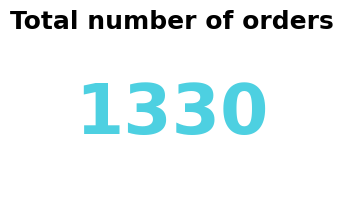

In [34]:
# Create a figure for visualization
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f'{total_orders}', ha='center', va='center', fontsize=50, fontweight='bold', color='#4dd0e1')
# Add a title
plt.title('Total number of orders', fontsize=18, fontweight='bold')
# Hide axes, as they are not needed
plt.axis('off')

plt.show()

**Total profit:**

In [35]:
total_profit = round(company_data['total_profit'].sum(), 2)
print(f'Total profit for all time: ${total_profit}')

Total profit for all time: $501888062.58


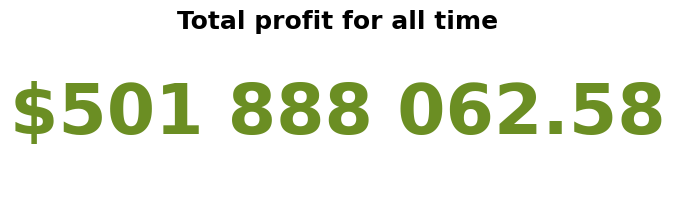

In [36]:
# Create a figure for visualization
plt.figure(figsize=(3, 2))
#f'{total_cost:,.}' - Indicates that formatting parameters will follow. / , (comma): Adds a thousands separator. / .replace(',', ' '): Replaces the comma, which is the standard thousands separator, with a space
plt.text(0.5, 0.5, f'${total_profit:,}'.replace(',', ' '), ha='center', va='center', fontsize=50, fontweight='bold', color='olivedrab')
# Add a title
plt.title('Total profit for all time', fontsize=18, fontweight='bold')
# Hide axes, as they are not needed
plt.axis('off')

plt.show()

**Total revenue:**

In [37]:
total_revenue = round(company_data['total_revenue'].sum(), 2)
print(f'Total revenue for all time: ${total_revenue}')

Total revenue for all time: $1705421127.89


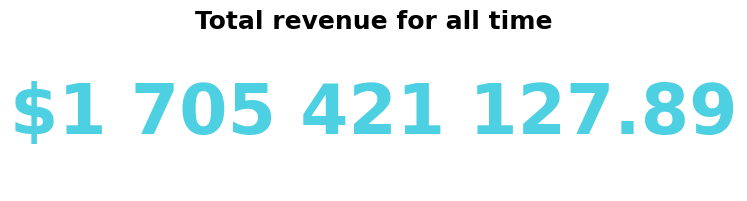

In [38]:
# Create a figure for visualization
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f'${total_revenue:,}'.replace(',', ' '), ha='center', va='center', fontsize=50, fontweight='bold', color='#4dd0e1')
# Add a title
plt.title('Total revenue for all time', fontsize=18, fontweight='bold')
# Hide axes, as they are not needed
plt.axis('off')

plt.show()

**Total cost:**

In [39]:
total_cost = round(company_data['total_cost'].sum(), 2)
print(f'Total cost for all time: ${total_revenue}')

Total cost for all time: $1705421127.89


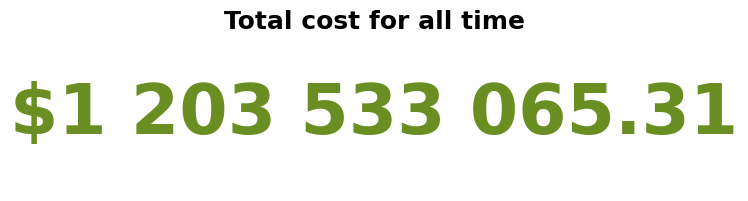

In [40]:
# Create a figure for visualization
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f'${total_cost:,}'.replace(',', ' '), ha='center', va='center', fontsize=50, fontweight='bold', color='olivedrab')
# Add a title
plt.title('Total cost for all time', fontsize=18, fontweight='bold')
# Hide axes, as they are not needed
plt.axis('off')

plt.show()

**Number of countries covered:**

In [41]:
#Filter the data, excluding 'UNKNOWN', and count the unique countries
total_countries = company_data[company_data['country_name'] != 'UNKNOWN']['country_name'].nunique()
print(f'Total number of countries covered: {total_countries}')

Total number of countries covered: 45


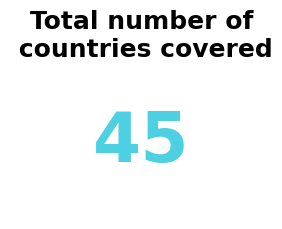

In [42]:
# Create a figure for visualization
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f'{total_countries}', ha='center', va='center', fontsize=50, fontweight='bold', color='#4dd0e1')
# Add a title
plt.title('Total number of\n countries covered', fontsize=18, fontweight='bold')
# Hide axes, as they are not needed
plt.axis('off')

plt.show()

**Number of unique categories of products:**

In [43]:
numb_product_category = company_data['product_category'].nunique()
print(f'Number of unique categories of products: {numb_product_category}')

Number of unique categories of products: 12


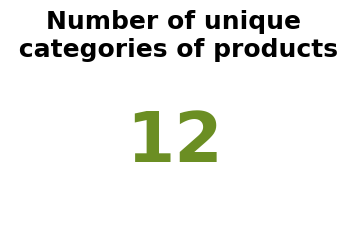

In [44]:
# Create a figure for visualization
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f'{numb_product_category}', ha='center', va='center', fontsize=50, fontweight='bold', color='olivedrab')
# Add a title
plt.title('Number of unique\n categories of products', fontsize=18, fontweight='bold')
# Hide axes, as they are not needed
plt.axis('off')

plt.show()

**Total number of units sold:**

In [45]:
numb_units_sold = round(company_data['units_sold'].sum())
print(f'Total number of units sold: {numb_units_sold}')

Total number of units sold: 6584748


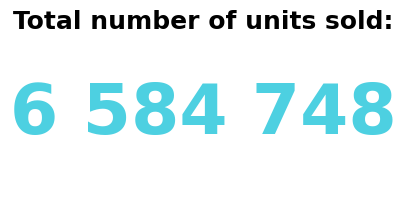

In [46]:
# Create a figure for visualization
plt.figure(figsize=(3, 2))
plt.text(0.5, 0.5, f'{numb_units_sold:,}'.replace(',', ' '), ha='center', va='center', fontsize=50, fontweight='bold', color='#4dd0e1')
# Add a title
plt.title('Total number of units sold:', fontsize=18, fontweight='bold')
# Hide axes, as they are not needed
plt.axis('off')

plt.show()

## **Sales analysis**

### **Sales by product category**

**Revenue, cost and profit by product category:**

In [47]:
# Group data and calculate sum of key metrics
category_metrics = company_data.groupby('product_category')[['total_revenue', 'total_cost', 'total_profit']].sum().reset_index()

# Sort data by total profit in descending order
company_metrics = category_metrics.sort_values(by='total_profit', ascending=False)

# Reshape DataFrame from wide to long format (necessary for seaborn)
company_metrics_long = company_metrics.melt(id_vars='product_category', value_vars=['total_revenue', 'total_cost', 'total_profit'], var_name='Sales metric', value_name='Amount, $')

In [48]:
print("Sales metrics by product category")
company_metrics

Sales metrics by product category


product_category  total_revenue    total_cost  total_profit
4         Cosmetics   2.331548e+08  1.404315e+08   92723306.17
8   Office Supplies   4.022140e+08  3.242368e+08   77977176.25
6         Household   2.942052e+08  2.212427e+08   72962466.77
0         Baby Food   1.436476e+08  8.970659e+07   53940997.16
3           Clothes   6.462655e+07  2.119524e+07   43431314.40
2            Cereal   9.579140e+07  5.453637e+07   41255034.15
11       Vegetables   8.974673e+07  5.297073e+07   36776002.72
7              Meat   2.270110e+08  1.962328e+08   30778233.20
10           Snacks   7.478861e+07  4.776119e+07   27027422.40
9     Personal Care   4.562177e+07  3.163325e+07   13988517.06
1         Beverages   2.909316e+07  1.949150e+07    9601662.78
5            Fruits   5.520300e+06  4.094370e+06    1425929.52

In [49]:
print("Sales metrics by product category in long format")
company_metrics_long

Sales metrics by product category in long format


product_category   Sales metric     Amount, $
0         Cosmetics  total_revenue  2.331548e+08
1   Office Supplies  total_revenue  4.022140e+08
2         Household  total_revenue  2.942052e+08
3         Baby Food  total_revenue  1.436476e+08
4           Clothes  total_revenue  6.462655e+07
5            Cereal  total_revenue  9.579140e+07
6        Vegetables  total_revenue  8.974673e+07
7              Meat  total_revenue  2.270110e+08
8            Snacks  total_revenue  7.478861e+07
9     Personal Care  total_revenue  4.562177e+07
10        Beverages  total_revenue  2.909316e+07
11           Fruits  total_revenue  5.520300e+06
12        Cosmetics     total_cost  1.404315e+08
13  Office Supplies     total_cost  3.242368e+08
14        Household     total_cost  2.212427e+08
15        Baby Food     total_cost  8.970659e+07
16          Clothes     total_cost  2.119524e+07
17           Cereal     total_cost  5.453637e+07
18       Vegetables     total_cost  5.297073e+07
19             Meat     total_cost  1.962328e+08
20           Snacks     total_cost  4.776119e+07
21    Personal Care     total_cost  3.163325e+07
22        Beverages     total_cost  1.949150e+07
23           Fruits     total_cost  4.094370e+06
24        Cosmetics   total_profit  9.272331e+07
25  Office Supplies   total_profit  7.797718e+07
26        Household   total_profit  7.296247e+07
27        Baby Food   total_profit  5.394100e+07
28          Clothes   total_profit  4.343131e+07
29           Cereal   total_profit  4.125503e+07
30       Vegetables   total_profit  3.677600e+07
31             Meat   total_profit  3.077823e+07
32           Snacks   total_profit  2.702742e+07
33    Personal Care   total_profit  1.398852e+07
34        Beverages   total_profit  9.601663e+06
35           Fruits   total_profit  1.425930e+06

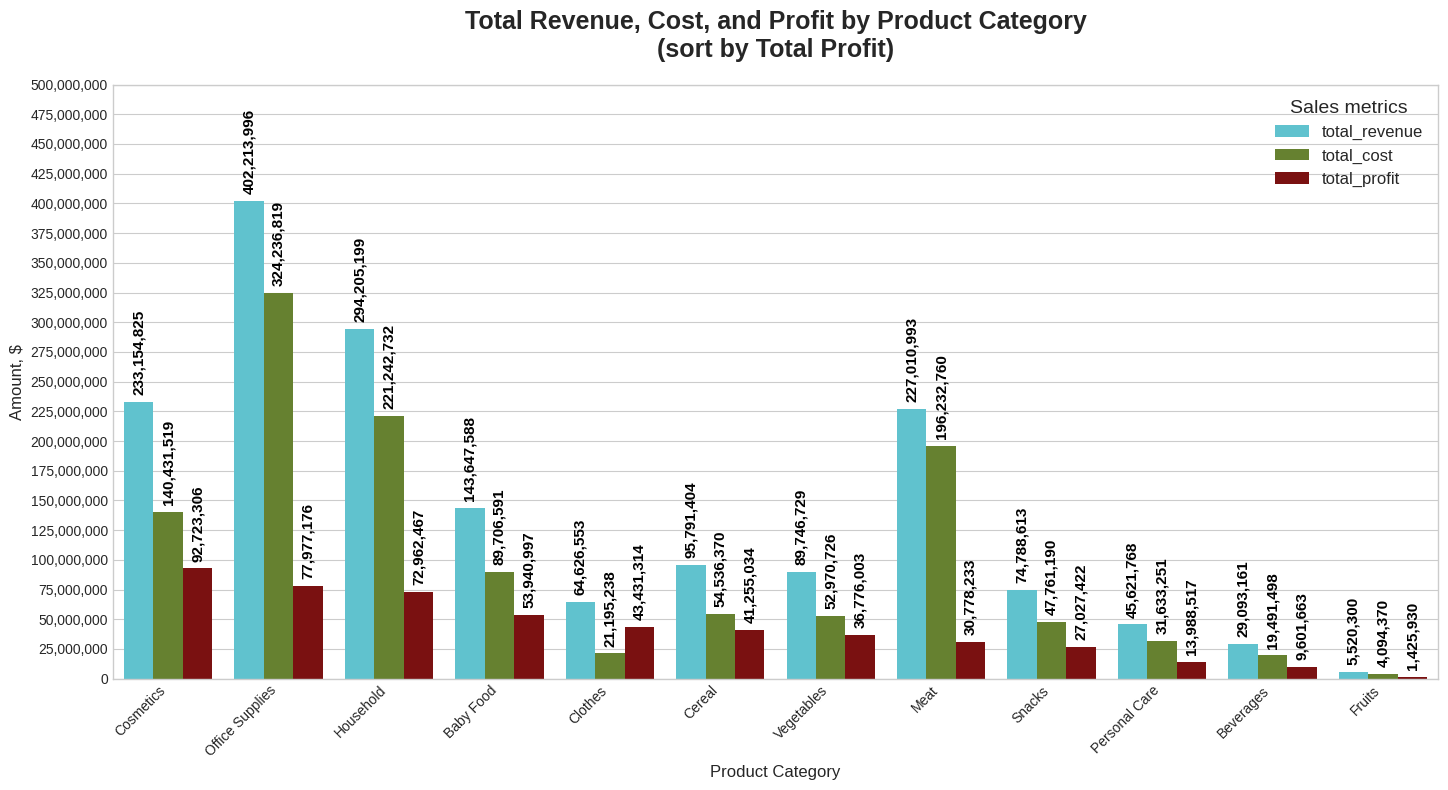

In [50]:
# Set the plot style and color palette
plt.style.use('seaborn-v0_8-whitegrid')
colors = ['#4dd0e1', 'olivedrab', 'darkred']

# create the grouped bar chart
plt.figure(figsize=(14, 8))
ax0 = sns.barplot(data=company_metrics_long, x='product_category', y='Amount, $', hue='Sales metric', palette=colors)

# Add titles and labels
plt.title('Total Revenue, Cost, and Profit by Product Category\n(sort by Total Profit)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Amount, $', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sales metrics', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Make Y-axis labels show full numbers without scientific notation
ax0.yaxis.set_major_locator(ticker.MultipleLocator(25000000))
ax0.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# add data labels inside the bars
for container in ax0.containers:
    ax0.bar_label(container, padding=5, fontsize=11, fontweight='bold', rotation=90, color='black', fmt='{:,.0f}')

# Set the upper limit of the Y-axis
plt.ylim(0, 500000000)


plt.show()

The highest profits come from the ***Cosmetics, Office Supplies, and Household*** categories, while the lowest profits are from ***Personal Care, Beverages, and Fruits***. The category with the highest revenue is ***Office Supplies***.

**Product category popularity:**

In [51]:
#total units sold  by product_category
product_popularity = company_data.groupby('product_category')['units_sold'].sum().sort_values(ascending=False)
print("Total units sold by category")
product_popularity

Total units sold by category


product_category
Office Supplies    617641.0
Beverages          613133.0
Fruits             591672.0
Clothes            591385.0
Vegetables         582544.0
Baby Food          562706.0
Personal Care      558201.0
Meat               538081.0
Cosmetics          533291.0
Snacks             490160.0
Cereal             465685.0
Household          440249.0
Name: units_sold, dtype: float64

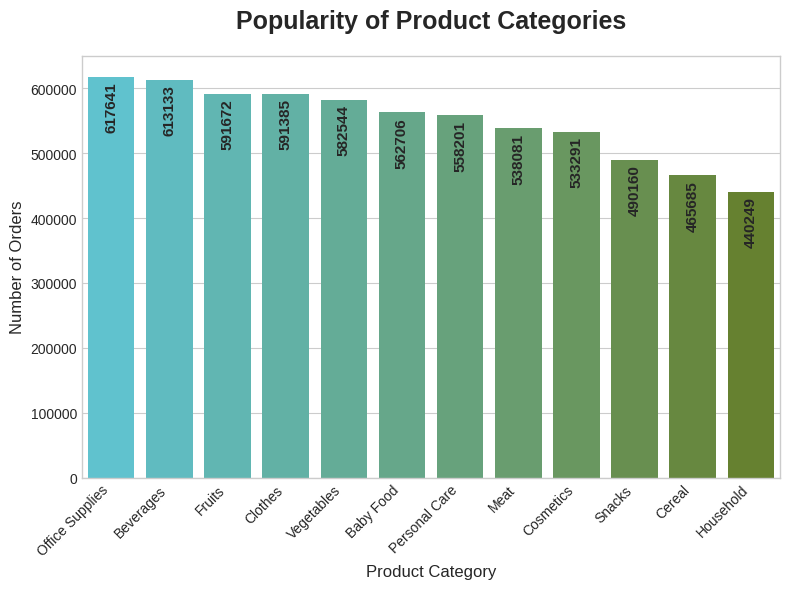

In [52]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a color palette with a gradient
gradient_colors = sns.color_palette(f"blend:#4dd0e1,olivedrab", len(product_popularity))

# Create the bar chart with the gradient palette
plt.figure(figsize=(8, 6))
ax1 = sns.barplot(x=product_popularity.index, y=product_popularity.values, hue=product_popularity.index, palette=gradient_colors, legend=False)

#Set the Y-axis limit
plt.ylim(0, 650000)


# Add titles and labels
plt.title('Popularity of Product Categories', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# add data labels inside the bars
for container in ax1.containers:
    ax1.bar_label(container, padding=-40, fontsize=11, fontweight='bold', rotation=90)

plt.show()

The most popular categories are ***Office Supplies, Beverages, and Fruits***. The least popular are ***Snacks, Cereal, and Household***.

### **Sales by countries**

**Revenue, cost and profit by countries:**

In [53]:
# Group data and calculate sum of key metrics
category_metrics_by_country = company_data[company_data['country_name'] != 'UNKNOWN'].groupby('country_name')[['total_revenue', 'total_cost', 'total_profit']].sum().reset_index()

# Sort data by total profit in descending order
company_metrics_by_country = category_metrics_by_country.sort_values(by='total_profit', ascending=False)

# Reshape DataFrame from wide to long format (necessary for seaborn)
#.head(10) for top 10 countries
company_metrics_by_country_long = company_metrics_by_country.head(10).melt(id_vars='country_name', value_vars=['total_revenue', 'total_cost', 'total_profit'], var_name='Sales metric', value_name='Amount, $')

print("Sales metrics by country")
company_metrics_by_country.head(10)

Sales metrics by country


country_name  total_revenue   total_cost  total_profit
1                  Andorra    47756693.17  32346656.54   15410036.63
43                 Ukraine    53252317.54  38447391.80   14804925.74
27                   Malta    47145320.81  32535192.93   14610127.88
36              San Marino    47883708.48  34090715.67   13792992.81
18                 Hungary    42408249.12  28622018.09   13786231.03
26               Macedonia    49222085.25  35537985.30   13684099.95
10          Czech Republic    53543932.14  39908338.36   13635593.78
35                  Russia    46051659.81  32783977.17   13267682.64
6   Bosnia And Herzegovina    50117508.49  36859905.72   13257602.77
17                  Greece    38699541.70  26375091.57   12324450.13

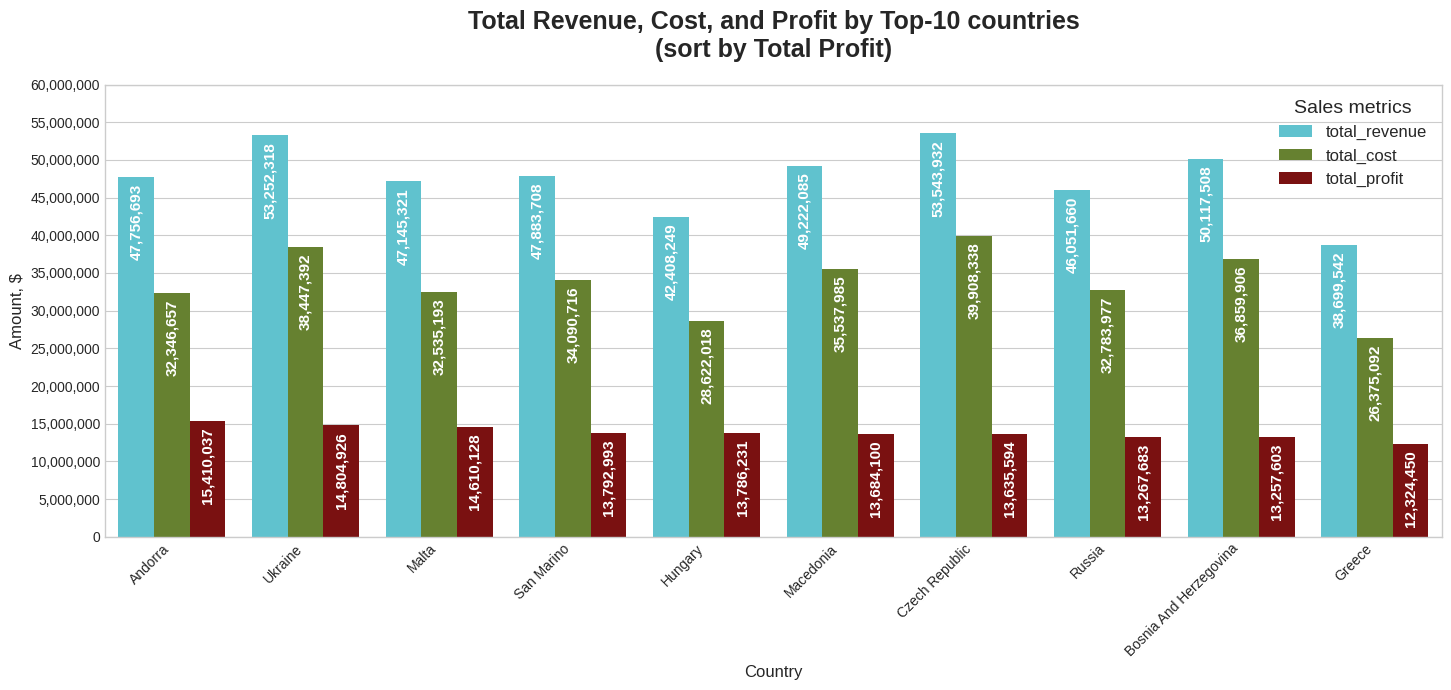

In [54]:
# Set the plot style and color palette
plt.style.use('seaborn-v0_8-whitegrid')
colors2 = ['#4dd0e1', 'olivedrab', 'darkred']

# create the grouped bar chart
plt.figure(figsize=(14, 7))
ax2 = sns.barplot(data=company_metrics_by_country_long, x='country_name', y='Amount, $', hue='Sales metric', palette=colors2)

# Add titles and labels
plt.title('Total Revenue, Cost, and Profit by Top-10 countries\n(sort by Total Profit)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Amount, $', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sales metrics', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Make Y-axis labels show full numbers without scientific notation
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5000000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the upper limit of the Y-axis
plt.ylim(0, 60000000)

# add data labels inside the bars
for container in ax2.containers:
    ax2.bar_label(container, padding=-60, fontsize=11, fontweight='bold', rotation=90, color='white', fmt='{:,.0f}')

plt.show()





The highest profits come from the ***Andorra, Ukraine, and Malta***. The country with the highest revenue is ***Czech Republic***.

**Product category popularity by countries** (it is impossible to make a visualization for all countries, so let's select the first 6 by profit level):

In [55]:
# Filter out rows where country_name is 'UNKNOWN'
not_unknown_counties = company_data[company_data['country_name'] != 'UNKNOWN']

# Get top 6 countries by total profit
top_6_countries = not_unknown_counties.groupby('country_name')['total_profit'].sum().nlargest(6).index

# Filter the DataFrame to include only the top 6 countries
top_countries_data = not_unknown_counties[not_unknown_counties['country_name'].isin(top_6_countries)]

# Group the filtered data and sum the units sold
popularity_by_country = top_countries_data.groupby(['country_name', 'product_category'])['units_sold'].sum().reset_index()

# Convert country_name to a categorical type for the correct order
popularity_by_country['country_name'] = pd.Categorical(popularity_by_country['country_name'], categories=top_6_countries, ordered=True)

# Sort the data by country order
popularity_by_country_sorted = popularity_by_country.sort_values(by=['country_name', 'units_sold'], ascending=[True, False])


In [56]:
popularity_by_country_sorted

country_name product_category  units_sold
1       Andorra        Beverages     29262.0
4       Andorra        Cosmetics     24145.0
6       Andorra        Household     23532.0
0       Andorra        Baby Food     19818.0
10      Andorra           Snacks     18748.0
..          ...              ...         ...
27    Macedonia           Fruits     15694.0
29    Macedonia             Meat     15378.0
24    Macedonia           Cereal      8563.0
31    Macedonia    Personal Care      6489.0
26    Macedonia        Cosmetics       869.0

[68 rows x 3 columns]

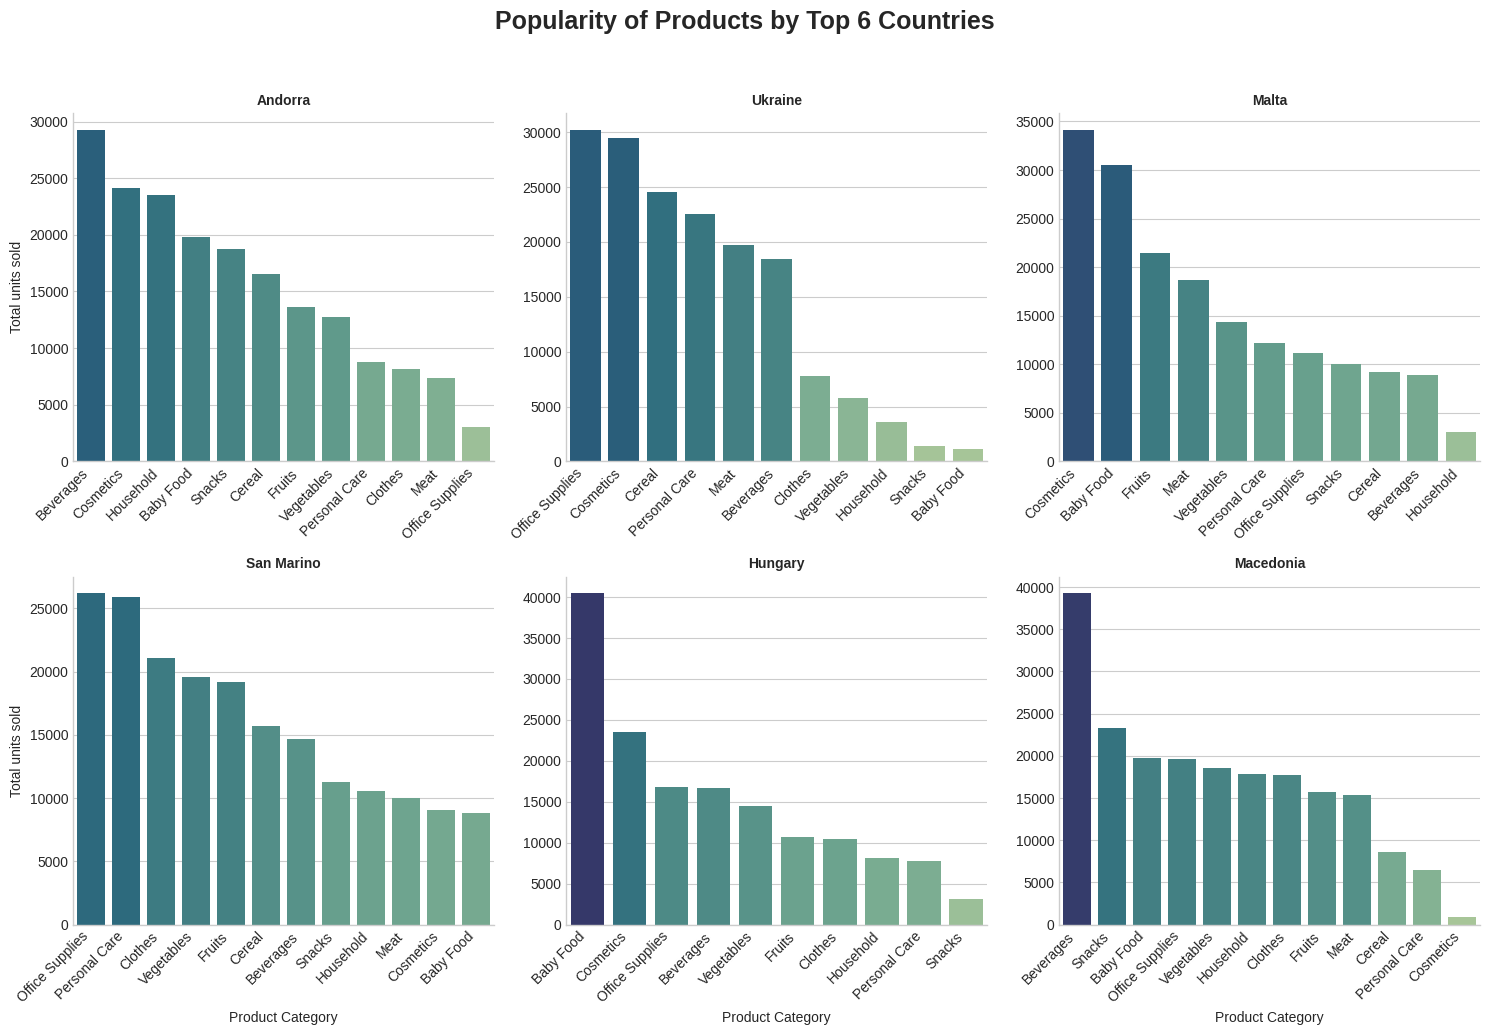

In [57]:
# Set the plot style and color palette
plt.style.use('seaborn-v0_8-whitegrid')

# Create a FacetGrid of bar charts
g = sns.catplot(
    data=popularity_by_country_sorted,
    x="product_category",
    y="units_sold",
    col="country_name",
    kind="bar",
    sharex=False, # each subplot will have its own X-axis
    sharey=False,  # each subplot will have its own Y-axis
    col_wrap=3, #plots at the row
    palette="crest",
    hue="units_sold",
    legend=False
)

# Set titles and labels for clarity
g.set_xticklabels(rotation=45, ha='right')
g.set_axis_labels("Product Category", "Total units sold")
g.set_titles(col_template="{col_name}", fontweight='bold')
g.fig.suptitle('Popularity of Products by Top 6 Countries', y=1.03, fontsize=18, fontweight='bold')
plt.tight_layout()

plt.show()

In the top 6 countries, the categories are distributed differently, which is visible from bar charts. Each country "specializes" in its own category.

### **Sales by region**

**Revenue, cost and profit by region:**

In [58]:
# Group data and calculate sum of key metrics
category_metrics_by_region = company_data[company_data['region'] != 'UNKNOWN'].groupby('region')[['total_revenue', 'total_cost', 'total_profit']].sum().reset_index()

# Sort data by total profit in descending order
company_metrics_by_region = category_metrics_by_region.sort_values(by='total_profit', ascending=False)

# Reshape DataFrame from wide to long format (necessary for seaborn)
company_metrics_long_by_region = company_metrics_by_region.melt(id_vars='region', value_vars=['total_revenue', 'total_cost', 'total_profit'], var_name='Sales metric', value_name='Amount, $')
print("Sales metrics by region")
company_metrics_long_by_region

Sales metrics by region


region   Sales metric     Amount, $
0  Europe  total_revenue  1.508945e+09
1    Asia  total_revenue  9.333089e+07
2  Europe     total_cost  1.059934e+09
3    Asia     total_cost  6.817863e+07
4  Europe   total_profit  4.490104e+08
5    Asia   total_profit  2.515225e+07

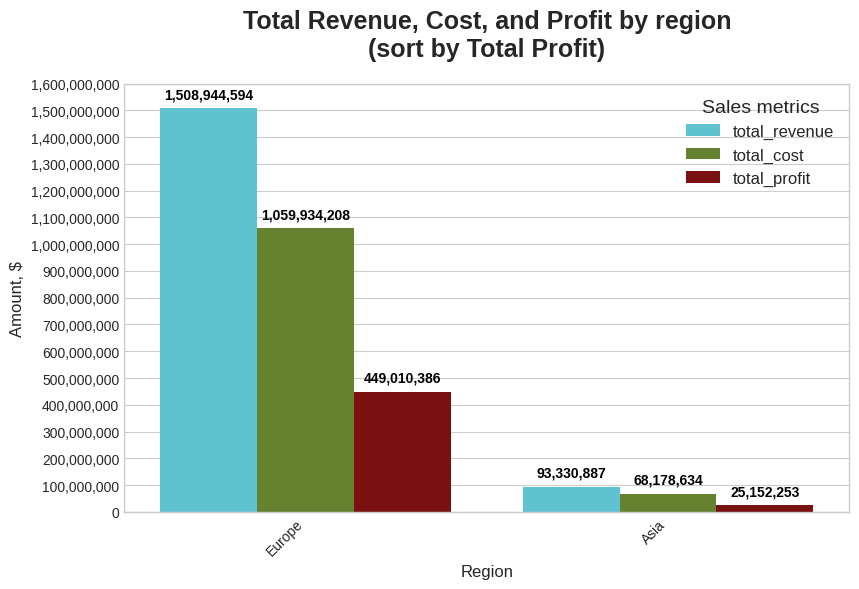

In [59]:
# Set the plot style and color palette
plt.style.use('seaborn-v0_8-whitegrid')
colors3 = ['#4dd0e1', 'olivedrab', 'darkred']

# create the grouped bar chart
plt.figure(figsize=(8, 6))
ax3 = sns.barplot(data=company_metrics_long_by_region, x='region', y='Amount, $', hue='Sales metric', palette=colors3)

# Add titles and labels
plt.title('Total Revenue, Cost, and Profit by region\n(sort by Total Profit)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Amount, $', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sales metrics', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Make Y-axis labels show full numbers without scientific notation
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100000000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the upper limit of the Y-axis
plt.ylim(0, 1600000000)

# add data labels inside the bars
for container in ax3.containers:
    ax3.bar_label(container, padding=5, fontsize=10, fontweight='bold', rotation=0, color='black', fmt='{:,.0f}')

plt.show()


***Europe*** significantly dominates over ***Asia*** in all metrics. Other regions are not represented.

**Product category popularity by region:**

In [60]:
# Group data and calculate metric
product_popularity_by_region = company_data[company_data['region'] != 'UNKNOWN'].groupby(['region', 'product_category'])[['units_sold']].sum().reset_index()

# Sort data by units sold in descending order
product_popularity_by_region_sort = product_popularity_by_region.sort_values(by='units_sold', ascending=False)

print("Products category popularity by region")
product_popularity_by_region_sort

Products category popularity by region


region product_category  units_sold
20  Europe  Office Supplies    570383.0
13  Europe        Beverages    562996.0
15  Europe          Clothes    537590.0
12  Europe        Baby Food    504393.0
16  Europe        Cosmetics    503324.0
23  Europe       Vegetables    497841.0
21  Europe    Personal Care    484084.0
17  Europe           Fruits    481134.0
14  Europe           Cereal    433791.0
19  Europe             Meat    410364.0
22  Europe           Snacks    394648.0
18  Europe        Household    388920.0
7     Asia             Meat     74570.0
10    Asia           Snacks     58973.0
5     Asia           Fruits     50001.0
9     Asia    Personal Care     46799.0
3     Asia          Clothes     41723.0
11    Asia       Vegetables     34669.0
6     Asia        Household     28388.0
2     Asia           Cereal     26475.0
0     Asia        Baby Food     19872.0
1     Asia        Beverages     14995.0
8     Asia  Office Supplies     11098.0
4     Asia        Cosmetics      2864.0

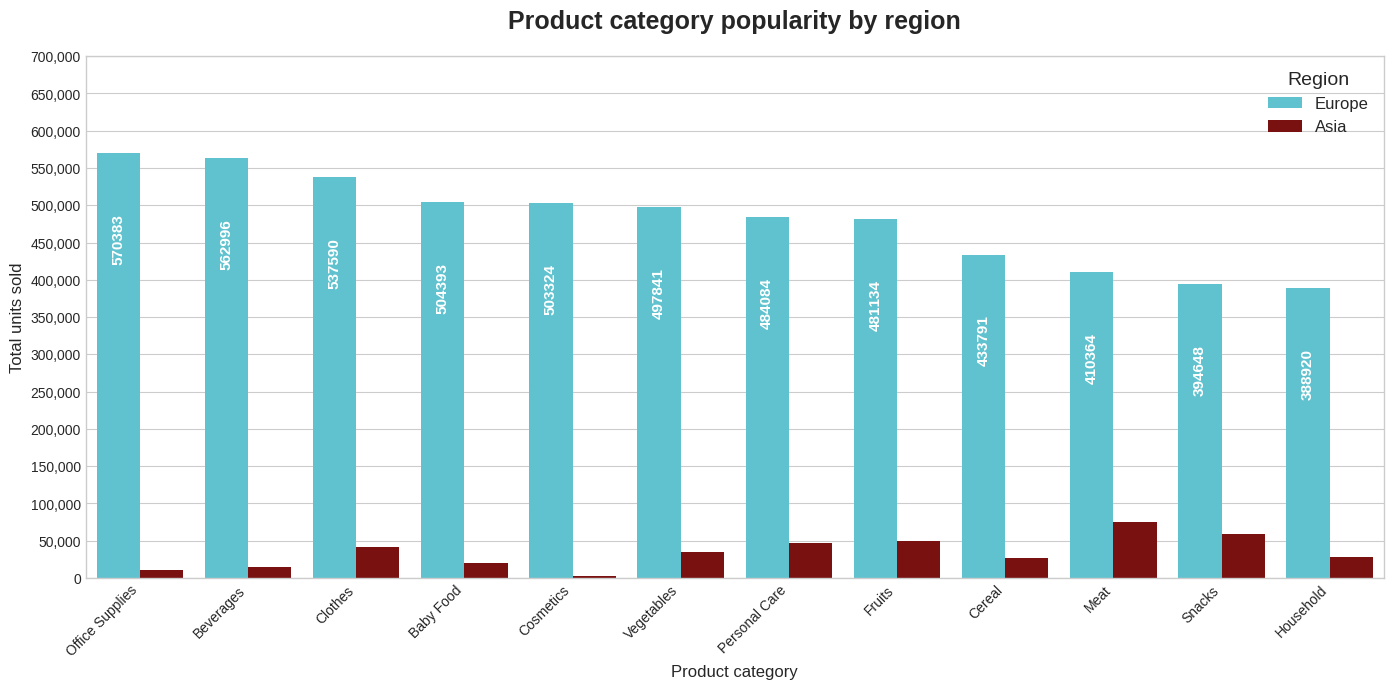

In [61]:
# Set the plot style and color palette
plt.style.use('seaborn-v0_8-whitegrid')
colors4 = ['#4dd0e1', 'darkred']

# create the grouped bar chart
plt.figure(figsize=(14, 7))
ax4 = sns.barplot(data=product_popularity_by_region_sort, x='product_category', y='units_sold', hue='region', palette=colors4)

# Add titles and labels
plt.title('Product category popularity by region', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Product category', fontsize=12)
plt.ylabel('Total units sold', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Make Y-axis labels show full numbers without scientific notation
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the upper limit of the Y-axis
plt.ylim(0, 700000)

# add data labels inside the bars
for container in ax4.containers:
    ax4.bar_label(container, padding=-80, fontsize=11, fontweight='bold', rotation=90, color='white', fmt='{:.0f}')

plt.show()

***Europe*** significantly dominates over ***Asia*** in all categories. Other regions are not represented.

### **Sales metrics by Sales Channel**

**Revenue, cost and profit by Sales Channel:**

In [62]:
# Group data and calculate sum of key metrics
category_metrics_by_channel = company_data[company_data['sales_channel'] != 'UNKNOWN'].groupby('sales_channel')[['total_revenue', 'total_cost', 'total_profit']].sum().reset_index()

# Sort data by total profit in descending order
company_metrics_by_channel = category_metrics_by_channel.sort_values(by='total_profit', ascending=False)

# Reshape DataFrame from wide to long format (necessary for seaborn)
company_metrics_long_by_channel = company_metrics_by_channel.melt(id_vars='sales_channel', value_vars=['total_revenue', 'total_cost', 'total_profit'], var_name='Sales metric', value_name='Amount, $')
print("Sales metrics by sales channel")
company_metrics_long_by_channel

Sales metrics by sales channel


sales_channel   Sales metric     Amount, $
0       Offline  total_revenue  8.750523e+08
1        Online  total_revenue  8.303688e+08
2       Offline     total_cost  6.211322e+08
3        Online     total_cost  5.824008e+08
4       Offline   total_profit  2.539201e+08
5        Online   total_profit  2.479679e+08

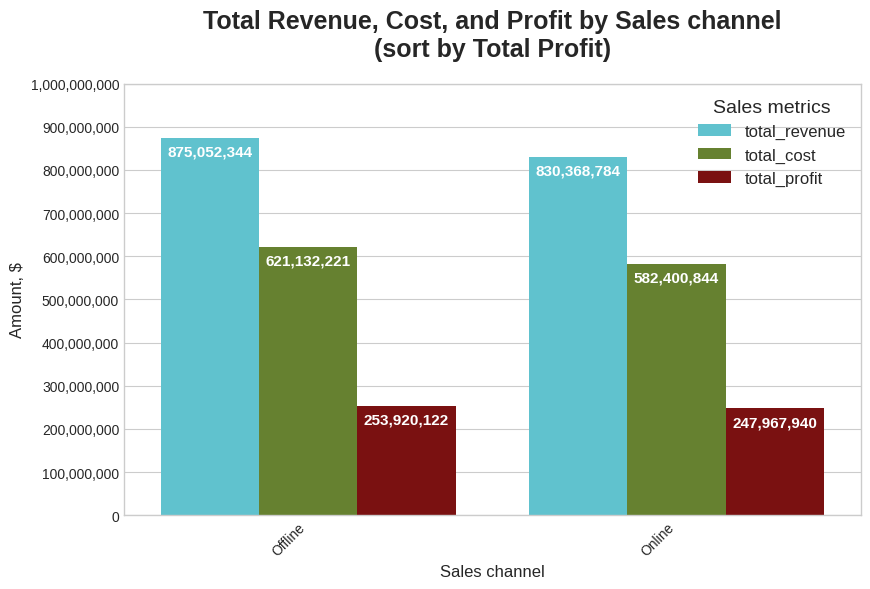

In [63]:
# Set the plot style and color palette
plt.style.use('seaborn-v0_8-whitegrid')
colors5 = ['#4dd0e1', 'olivedrab', 'darkred']

# create the grouped bar chart
plt.figure(figsize=(8, 6))
ax5 = sns.barplot(data=company_metrics_long_by_channel, x='sales_channel', y='Amount, $', hue='Sales metric', palette=colors5)

# Add titles and labels
plt.title('Total Revenue, Cost, and Profit by Sales channel\n(sort by Total Profit)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Sales channel', fontsize=12)
plt.ylabel('Amount, $', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sales metrics', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Make Y-axis labels show full numbers without scientific notation
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(100000000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the upper limit of the Y-axis
plt.ylim(0, 1000000000)

# add data labels inside the bars
for container in ax5.containers:
    ax5.bar_label(container, padding=-15, fontsize=11, fontweight='bold', rotation=0, color='white', fmt='{:,.0f}')

plt.show()

***Online*** and ***offline*** channels have approximately equal performance across all metrics and play an identical role in the company's revenue.

**Producr category popularity by Sales channel:**

In [64]:
#Group data and calculate metric for each sales channel and category
product_popularity_by_channel = company_data.groupby(['sales_channel', 'product_category'])[['units_sold']].sum().reset_index()

# Calculate the total sum of units sold for each category across all channels
total_units_by_category = product_popularity_by_channel.groupby('product_category')['units_sold'].sum()

# Get the sorted order of categories based on total units sold
sorted_categories = total_units_by_category.sort_values(ascending=False).index

# Convert product_category column to a categorical type with the desired order
product_popularity_by_channel['product_category'] = pd.Categorical(product_popularity_by_channel['product_category'], categories=sorted_categories, ordered=True)

# sort DataFrame based on the new categorical order
product_popularity_by_channel_sort = product_popularity_by_channel.sort_values('product_category')
product_popularity_by_channel_sort.head(10)

sales_channel product_category  units_sold
20        Online  Office Supplies    259605.0
8        Offline  Office Supplies    358036.0
1        Offline        Beverages    291836.0
13        Online        Beverages    321297.0
17        Online           Fruits    302795.0
5        Offline           Fruits    288877.0
3        Offline          Clothes    298383.0
15        Online          Clothes    293002.0
11       Offline       Vegetables    285566.0
23        Online       Vegetables    296978.0

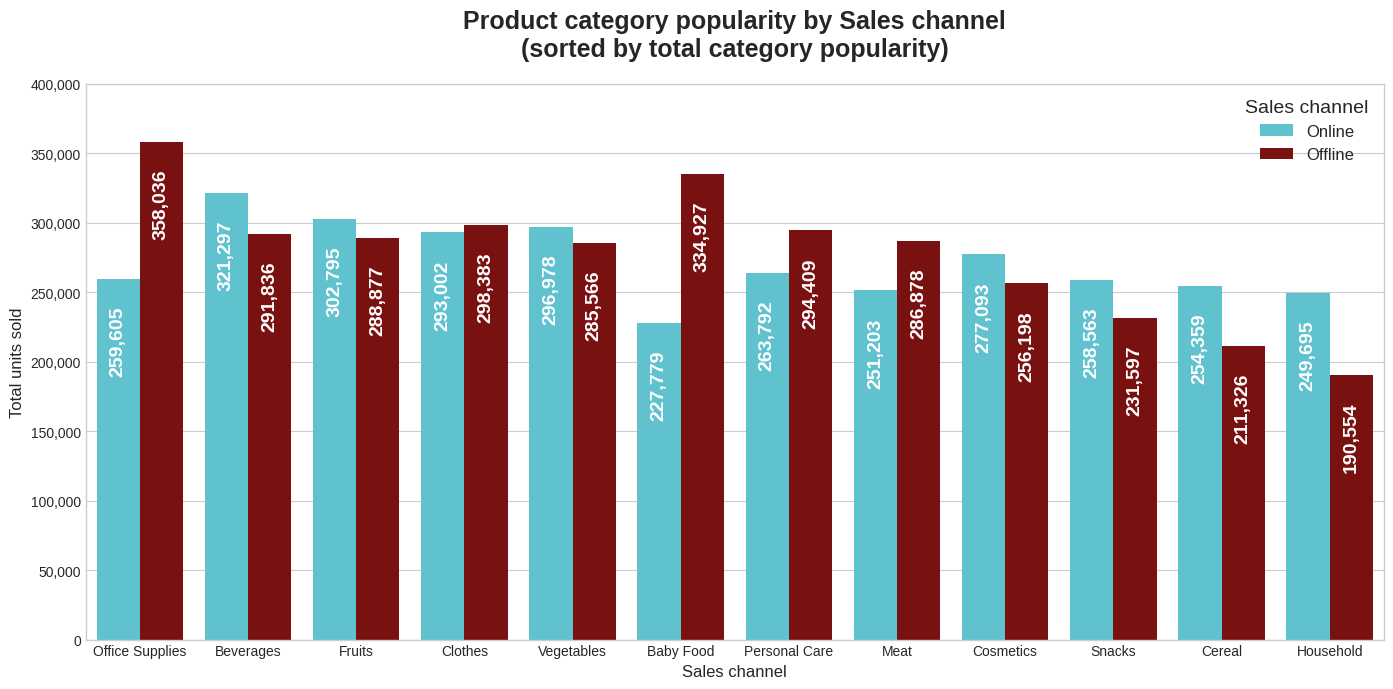

In [65]:
# Set the plot style and color palette
plt.style.use('seaborn-v0_8-whitegrid')
colors6 = ['#4dd0e1', 'darkred']

# create the grouped bar chart
plt.figure(figsize=(14, 7))
ax6 = sns.barplot(data=product_popularity_by_channel_sort, x='product_category', y='units_sold', hue='sales_channel', palette=colors6)

# Add titles and labels
plt.title('Product category popularity by Sales channel\n(sorted by total category popularity)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Sales channel', fontsize=12)
plt.ylabel('Total units sold', fontsize=12)
plt.legend(title='Sales channel', fontsize=12, title_fontsize=14)
plt.tight_layout()

# Make Y-axis labels show full numbers without scientific notation
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(50000))
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Set the upper limit of the Y-axis
plt.ylim(0, 400000)

# add data labels inside the bars
for container in ax6.containers:
    ax6.bar_label(container, padding=-70, fontsize=14, fontweight='bold', rotation=90, color='white', fmt='{:,.0f}')

plt.show()


Based on the diagram, the ***Office Supplies*** category has the highest popularity, followed by ***Beverages and Fruits*** for online sales, and ***Baby Food and Personal Care*** for offline sales. ***Online*** and ***offline*** sales have similar total units sold across most categories, with ***offline*** sales slightly higher in some cases.

## **Analysis of the time interval between order and shipment**

### **Analysis of the time interval between order and shipment by product category**

In [66]:
product_category_interval = company_data.groupby('product_category')['interval_days'].median().sort_values(ascending=False)
print("Shipment interval by category")
product_category_interval

Shipment interval by category


product_category
Cereal             29.0
Baby Food          28.5
Cosmetics          28.0
Office Supplies    27.0
Snacks             25.0
Meat               25.0
Household          24.0
Beverages          23.0
Fruits             23.0
Clothes            21.0
Vegetables         21.0
Personal Care      20.0
Name: interval_days, dtype: float64

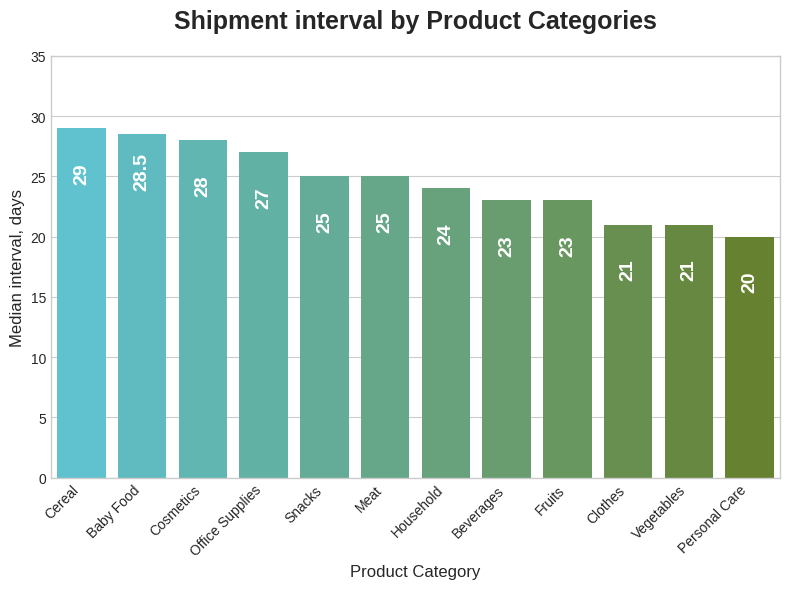

In [67]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a color palette with a gradient
gradient_colors2 = sns.color_palette(f"blend:#4dd0e1,olivedrab", len(product_category_interval))

# Create the bar chart with the gradient palette
plt.figure(figsize=(8, 6))
ax7 = sns.barplot(x=product_category_interval.index, y=product_category_interval.values, hue=product_category_interval.index, palette=gradient_colors2, legend=False)

#Set the Y-axis limit
plt.ylim(0, 35)


# Add titles and labels
plt.title('Shipment interval by Product Categories', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Median interval, days', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# add data labels inside the bars
for container in ax7.containers:
    ax7.bar_label(container, padding=-40, fontsize=14, fontweight='bold', rotation=90, color='white')

plt.show()

The ***Cereal*** and ***Baby Food*** categories require the most time for order preparation and delivery, with 29 and 28.5 median days, respectively. The categories with the fastest delivery times are ***Personal Care*** and ***Vegetables***, with 20 and 21 days, respectively.

### **Analysis of the time interval between order and shipment by countries**

In [68]:
country_interval = company_data[company_data['country_name'] != 'UNKNOWN'].groupby('country_name')['interval_days'].median().sort_values(ascending=False)
print("Shipment interval by country")
country_interval.head(10)

Shipment interval by country


country_name
Hungary                   36.0
Russia                    34.0
Monaco                    33.0
Georgia                   32.0
Slovakia                  32.0
Finland                   31.0
Luxembourg                30.5
Lithuania                 30.0
Bosnia And Herzegovina    30.0
Austria                   29.0
Name: interval_days, dtype: float64

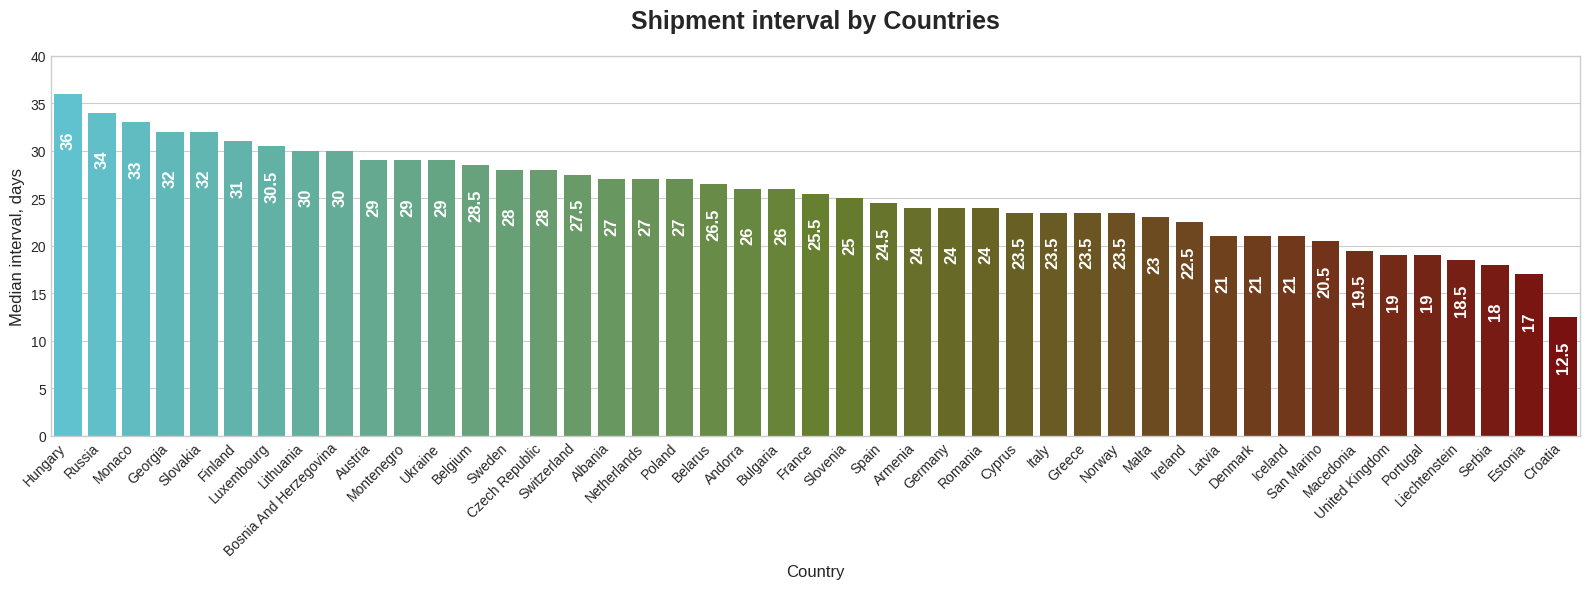

In [69]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a color palette with a gradient
gradient_colors3 = sns.color_palette(f"blend:#4dd0e1,olivedrab,darkred", len(country_interval))

# Create the bar chart with the gradient palette
plt.figure(figsize=(16, 6))
ax8 = sns.barplot(x=country_interval.index, y=country_interval.values, hue=country_interval.index, palette=gradient_colors3, legend=False)

#Set the Y-axis limit
plt.ylim(0, 40)


# Add titles and labels
plt.title('Shipment interval by Countries', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Median interval, days', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# add data labels inside the bars
for container in ax8.containers:
    ax8.bar_label(container, padding=-40, fontsize=12, fontweight='bold', rotation=90, color='white')

plt.show()

The chart shows that shipment intervals vary significantly across different countries, ranging from a median of 36 days down to just 12.5 days. **Hungary, Russia, and Monaco** have the longest median shipment times, all exceeding 30 days. In contrast, the top 6 countries with the fastest delivery times are C***roatia, Slovenia, Estonia, Serbia, Portugal, and United Kingdom,*** with median intervals of 20 days or less.

### **Analysis of the time interval between order and shipment by regions and sub-regions**

In [70]:
region_interval = company_data[company_data['region'] != 'UNKNOWN'].groupby('region')['interval_days'].median().sort_values(ascending=False)
print("Shipment interval by region")
region_interval

Shipment interval by region


region
Asia      25.5
Europe    25.0
Name: interval_days, dtype: float64

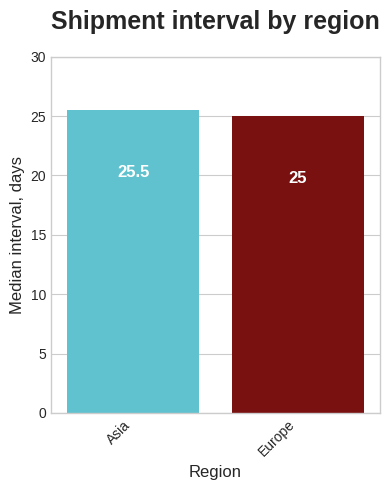

In [71]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a color palette with a gradient
gradient_colors4 = sns.color_palette(f"blend:#4dd0e1,olivedrab,darkred", len(region_interval))

# Create the bar chart with the gradient palette
plt.figure(figsize=(4, 5))
ax9 = sns.barplot(x=region_interval.index, y=region_interval.values, hue=region_interval.index, palette=gradient_colors4, legend=False)

#Set the Y-axis limit
plt.ylim(0, 30)


# Add titles and labels
plt.title('Shipment interval by region', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Median interval, days', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# add data labels inside the bars
for container in ax9.containers:
    ax9.bar_label(container, padding=-50, fontsize=12, fontweight='bold', rotation=0, color='white')

plt.show()

***Europe and Asia*** have approximately the same delivery interval.

In [72]:
sub_region_interval = company_data[company_data['sub-region'] != 'UNKNOWN'].groupby('sub-region')['interval_days'].median().sort_values(ascending=False)
print("Shipment interval by sub-region")
sub_region_interval

Shipment interval by sub-region


sub-region
Eastern Europe     29.0
Western Europe     26.0
Western Asia       25.5
Southern Europe    23.0
Northern Europe    21.0
Name: interval_days, dtype: float64

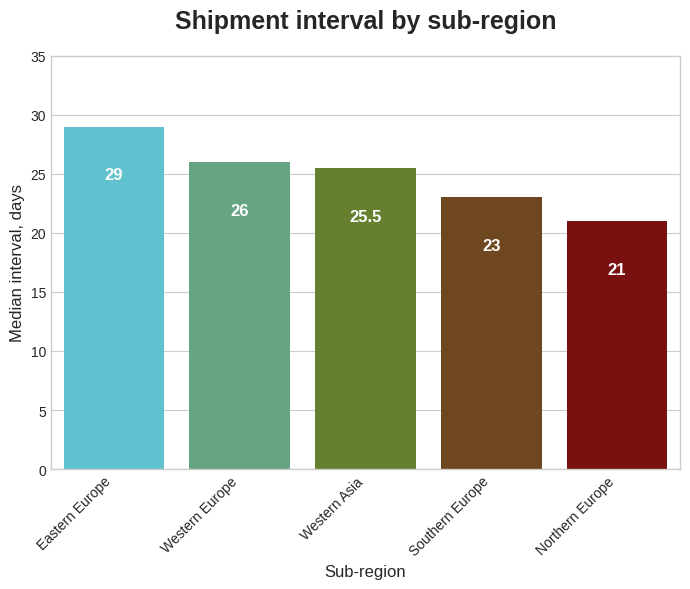

In [73]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create a color palette with a gradient
gradient_colors5 = sns.color_palette(f"blend:#4dd0e1,olivedrab,darkred", len(sub_region_interval))

# Create the bar chart with the gradient palette
plt.figure(figsize=(7, 6))
ax10 = sns.barplot(x=sub_region_interval.index, y=sub_region_interval.values, hue=sub_region_interval.index, palette=gradient_colors5, legend=False)

#Set the Y-axis limit
plt.ylim(0, 35)


# Add titles and labels
plt.title('Shipment interval by sub-region', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Sub-region', fontsize=12)
plt.ylabel('Median interval, days', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# add data labels inside the bars
for container in ax10.containers:
    ax10.bar_label(container, padding=-40, fontsize=12, fontweight='bold', rotation=0, color='white')

plt.show()

The fastest deliveries occur in the **Northern Europe** sub-region (21 median days), while the slowest are in **Eastern Europe** (29 median days).

## **Analysis of the dependence of profit on the time required for product shipment**

In [74]:
profit_interval = company_data.groupby('interval_days')['total_profit'].median().reset_index()
profit_interval

interval_days  total_profit
0               0    149582.405
1               1    310210.010
2               2    258251.760
3               3    192328.320
4               4    246901.430
5               5    381275.000
6               6    237659.895
7               7    252553.595
8               8    198063.105
9               9    204473.280
10             10    145900.555
11             11    317985.810
12             12    342987.080
13             13    216805.145
14             14    197132.655
15             15    249672.780
16             16    357553.625
17             17    314210.375
18             18    127428.540
19             19    394105.940
20             20    123807.670
21             21    217786.660
22             22    249158.620
23             23    134347.680
24             24    278507.500
25             25    335983.475
26             26    193445.480
27             27    169427.500
28             28    279750.975
29             29    325579.590
30             30    435984.045
31             31    453051.360
32             32    181796.430
33             33    426904.255
34             34    251023.145
35             35    275767.200
36             36    395377.170
37             37    292733.810
38             38    322604.085
39             39    371857.200
40             40    349045.770
41             41    335935.600
42             42    227684.640
43             43    404413.350
44             44    328654.780
45             45    254519.450
46             46    283788.540
47             47    533378.195
48             48    169793.280
49             49    300814.800
50             50    128109.290

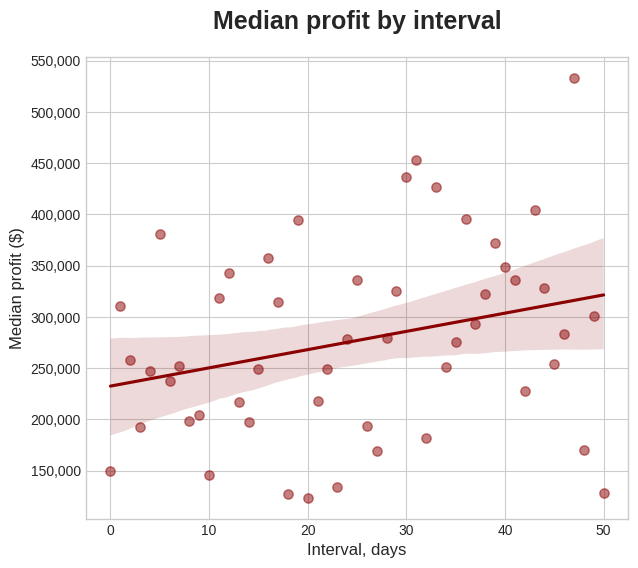

In [75]:
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(7, 6))

ax11 = sns.regplot(data=profit_interval, x="interval_days", y="total_profit", fit_reg=True, color="darkred", scatter_kws={"alpha": 0.5, "s": 45})

plt.title("Median profit by interval", fontsize=18, fontweight='bold', pad=20)
plt.xlabel("Interval, days", fontsize=12)
plt.ylabel("Median profit ($)", fontsize=12)

ax11.yaxis.set_major_locator(ticker.MultipleLocator(50000))
ax11.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

**Let's calculate the correlation coefficient and p-value. To do this, let's import the SciPy library**

In [76]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(profit_interval['total_profit'], profit_interval['interval_days'])

# Print the results
print(f"The correlation coefficient between profit and delivery time: {round(correlation, 2)}")
print(f"p-value: {round(p_value, 3)}")

The correlation coefficient between profit and delivery time: 0.28
p-value: 0.046


The scatter plot shows the relationship between `median profit` and the `delivery interval` in days. The data points are widely scattered, which indicates the absence of a strong linear correlation. A high median profit can be achieved with both very short delivery times (less than 10 days) and longer ones (over 40 days). The `p-value` is below the significance threshold of `0.05`. This means that, although the correlation is weak, it is real, the relationship is positive, and there is indeed a very slight trend where profit increases as the delivery interval grows. This could be related to larger clients needing more time for order processing. Therefore, it can be concluded that profit and the time required for product shipment do have a weak dependence, although it is likely indirect and mediated by other factors.

## **Sales dynamics**

### **Overall sales dynamics**

**Monthly overall sales dynamics**

In [77]:
monthly_sales = company_data.groupby(['month'], observed=True)['total_profit'].sum().reset_index()
print('Monthly Seasonal Sales Dynamics')
monthly_sales

Monthly Seasonal Sales Dynamics


month  total_profit
0     January   52805166.81
1    February   39570726.10
2       March   50804768.82
3       April   33733536.07
4         May   46286704.03
5        June   50204756.12
6        July   45500472.30
7      August   32762177.70
8   September   40327542.44
9     October   33692715.75
10   November   37904114.84
11   December   38295381.60

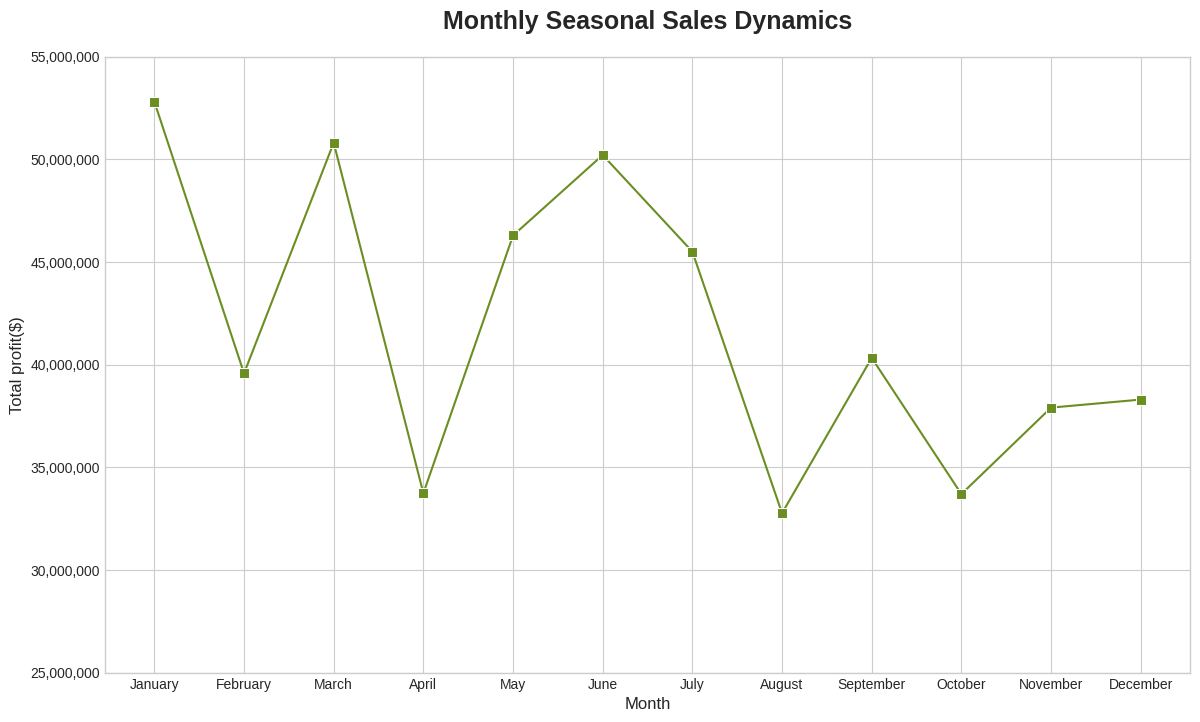

In [78]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the line plot
plt.figure(figsize=(14, 8))
ax12 = sns.lineplot(data=monthly_sales, x='month', y='total_profit', color='olivedrab', marker='s', markersize=7)

# Add titles and labels
plt.title('Monthly Seasonal Sales Dynamics', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total profit($)', fontsize=12)

# Set the Y-axis limit and ticks
plt.ylim(25000000, 55000000)
#ax12.yaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax12.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

There is seasonality in sales, with the most profitable months being **January, March, and June**. The least profitable are **August, April, and October**.

**Year overall sales dynamics**

In [79]:
yearly_sales = company_data.groupby(['year'], observed=True)['total_profit'].sum().reset_index()
print('Sales Dynamics by Year')
yearly_sales

Sales Dynamics by Year


year  total_profit
0  2010   61422459.90
1  2011   69044659.73
2  2012   87884066.44
3  2013   53387995.18
4  2014   71643229.18
5  2015   61734039.82
6  2016   57771920.85
7  2017   38999691.48

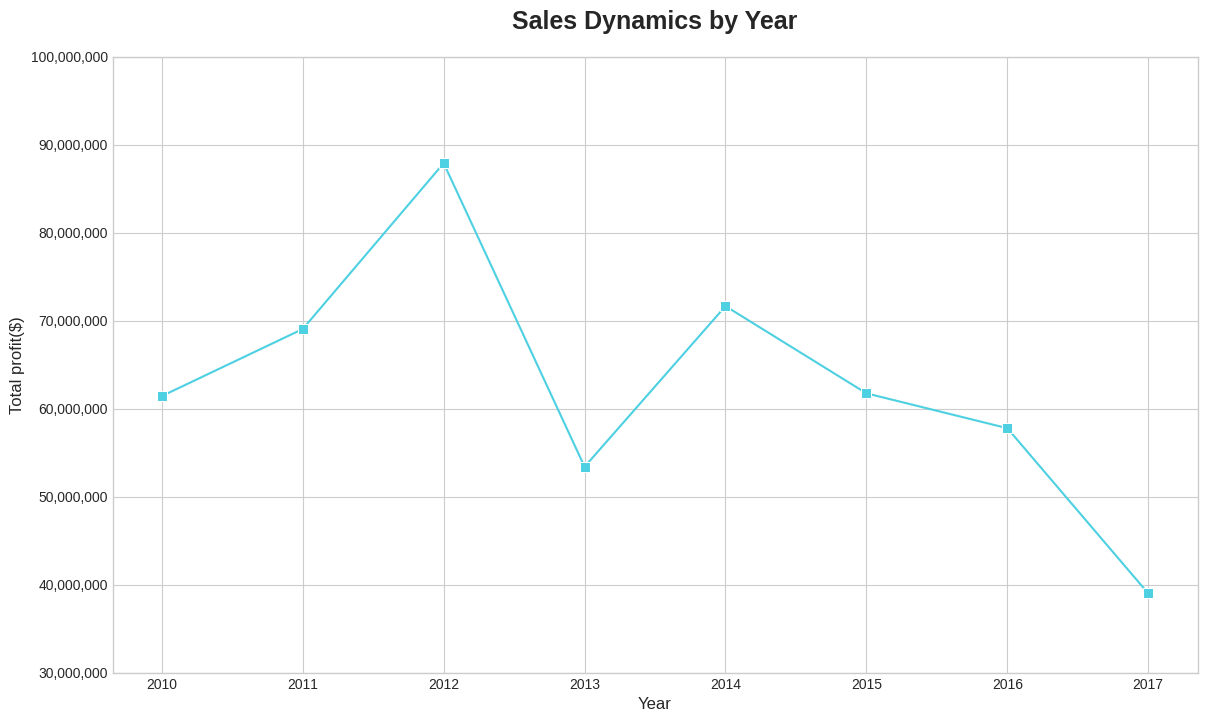

In [80]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the line plot
plt.figure(figsize=(14, 8))
ax13 = sns.lineplot(data=yearly_sales, x='year', y='total_profit', color='#4dd0e1', marker='s', markersize=7)

# Add titles and labels
plt.title('Sales Dynamics by Year', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total profit($)', fontsize=12)

# Set the Y-axis limit and ticks
plt.ylim(30000000, 100000000)
#ax13.yaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax13.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

Profit grew until 2012, after which fluctuations began, with a decline in recent years. This could indicate market saturation or the emergence of new competitors, which requires a more in-depth analysis.

### **Sales dynamics by product category**

**Monthly seasonal sales dynamics by product category**


In [81]:
# Group the data by product category to calculate the total revenue for each
top_5_categories = company_data.groupby('product_category')['total_profit'].sum().nlargest(5).index

# Group the data by month and product category and calculate the total revenue
#observed=True will only take into categories that are actually present in the data.
monthly_sales_by_category = company_data.groupby(['month', 'product_category'], observed=True)['total_profit'].sum().reset_index()

# filter to include only the top 5 categories
monthly_sales_by_category_top5 = monthly_sales_by_category[monthly_sales_by_category['product_category'].isin(top_5_categories)]


print("Monthly Sales by Product Category")
monthly_sales_by_category_top5.head(10)

Monthly Sales by Product Category


month product_category  total_profit
0    January        Baby Food    8458782.26
3    January          Clothes    6038750.88
4    January        Cosmetics   13805104.13
6    January        Household    4381072.55
8    January  Office Supplies    5155923.75
12  February        Baby Food    2433022.66
15  February          Clothes     870557.76
16  February        Cosmetics    6147869.33
18  February        Household    7963989.42
20  February  Office Supplies    6222231.25

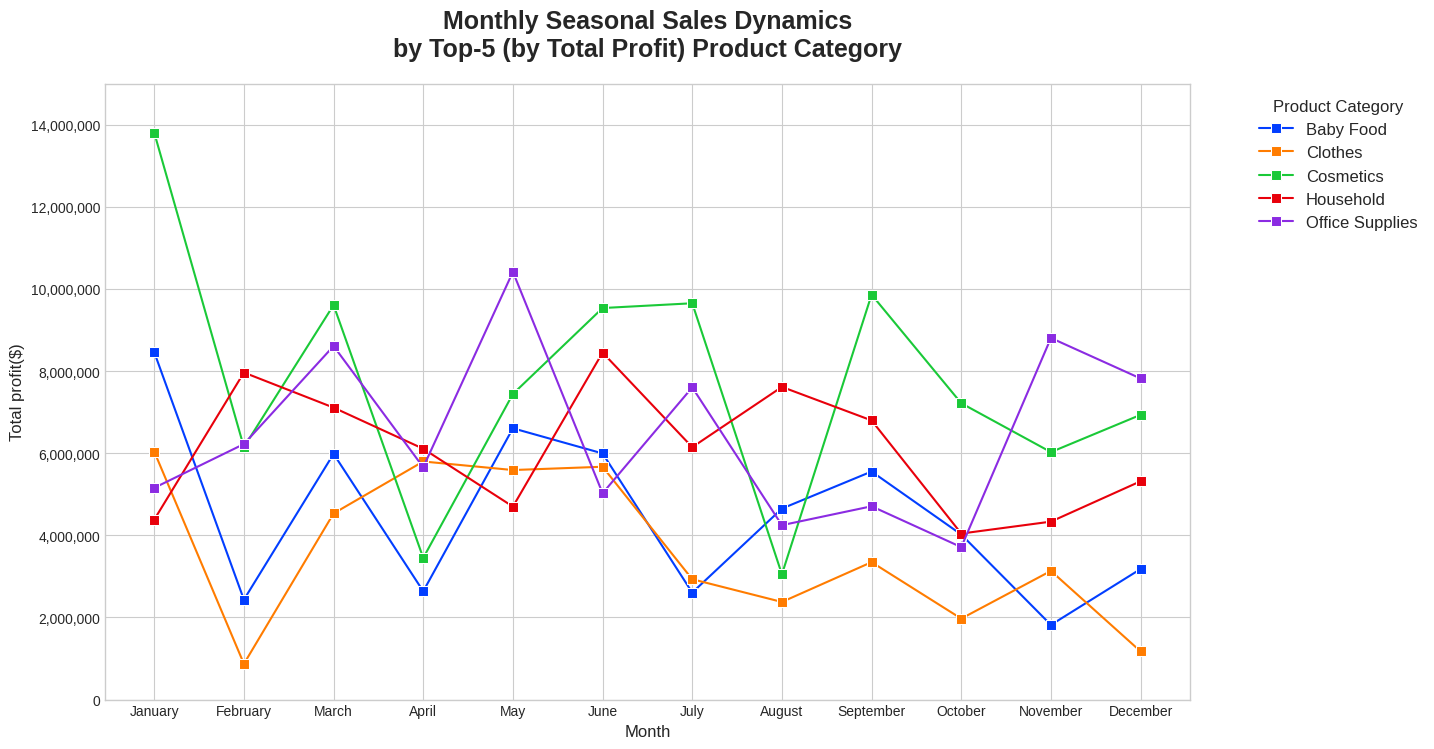

In [82]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the line plot
plt.figure(figsize=(14, 8))
ax14 = sns.lineplot(data=monthly_sales_by_category_top5, x='month', y='total_profit', hue='product_category', palette='bright', marker='s', markersize=6.5)

# Add titles and labels
plt.title('Monthly Seasonal Sales Dynamics\nby Top-5 (by Total Profit) Product Category', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total profit($)', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Set the Y-axis limit and ticks
plt.ylim(0, 15000000)
ax14.yaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax14.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

Sales dynamics show significant **monthly seasonality**, with a clear peak occurring in **January**. All categories follow a similar trend. Also there are sales peaks in **March, May and September**, can also be observed for most categories. The **Office Supplies** and **Cosmetics** category consistently generates the highest profit.

**Sales dynamics by product category and year**


In [83]:
# Group the data by month and product category and calculate the total revenue
#observed=True will only take into categories that are actually present in the data.
yearly_sales_by_category = company_data.groupby(['year', 'product_category'], observed=True)['total_profit'].sum().reset_index()

# We can use top_5_categories from previos step
# filter to include only the top 5 categories
yearly_sales_by_category_top5 = yearly_sales_by_category[yearly_sales_by_category['product_category'].isin(top_5_categories)]


print("Sales by Product Category and Year")
yearly_sales_by_category_top5.head(15)

Sales by Product Category and Year


year product_category  total_profit
0   2010        Baby Food    6891087.82
3   2010          Clothes    5188315.68
4   2010        Cosmetics   10188955.87
6   2010        Household    8320806.11
8   2010  Office Supplies    7905396.25
12  2011        Baby Food    5452804.38
15  2011          Clothes    4971520.80
16  2011        Cosmetics   15645865.82
18  2011        Household    7461827.52
20  2011  Office Supplies   11346718.75
24  2012        Baby Food   10612468.88
27  2012          Clothes    8429516.64
28  2012        Cosmetics   22534769.09
30  2012        Household   10834598.75
32  2012  Office Supplies   10144061.25

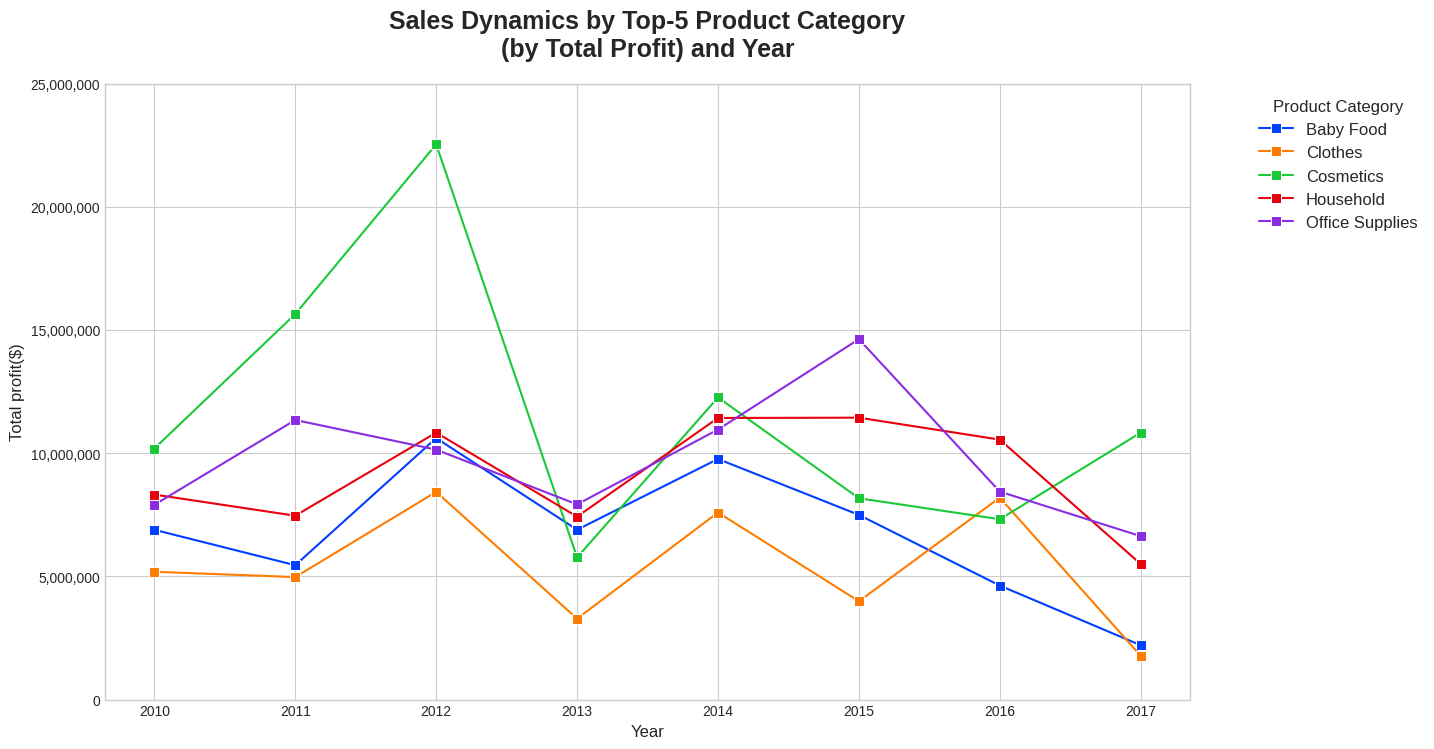

In [84]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the line plot
plt.figure(figsize=(14, 8))
ax15 = sns.lineplot(data=yearly_sales_by_category_top5, x='year', y='total_profit', hue='product_category', palette='bright', marker='s', markersize=6.5)

# Add titles and labels
plt.title('Sales Dynamics by Top-5 Product Category\n(by Total Profit) and Year', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total profit($)', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Set the Y-axis limit and ticks
plt.ylim(0, 25000000)
#ax15.yaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax15.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

The profit growth up to 2012, when it reached its peak, was followed by a period of fluctuation and a decline in recent years. This trend may indicate **market saturation** or **increased competition**, which requires further analysis. The categories of **Office Supplies** and **Cosmetics** are the most significant in terms of profit dynamics. They not only consistently generate the highest revenue but also play a key role in shaping overall seasonality and company growth.

### **Sales dynamics by countries**

**Monthly seasonal sales dynamics by country**

In [85]:
# Group the data by product category to calculate the total revenue for each
top_5_countries = company_data[company_data['country_name'] != 'UNKNOWN'].groupby('country_name')['total_profit'].sum().nlargest(5).index

# Group the data by month and product category and calculate the total revenue
#observed=True will only take into categories that are actually present in the data.
monthly_sales_by_country = company_data[company_data['country_name'] != 'UNKNOWN'].groupby(['month', 'country_name'], observed=True)['total_profit'].sum().reset_index()

# filter to include only the top 5 categories
monthly_sales_by_country_top5 = monthly_sales_by_country[monthly_sales_by_country['country_name'].isin(top_5_countries)]


print("Monthly Sales by Country")
monthly_sales_by_country_top5.head(10)

Monthly Sales by Country


month country_name  total_profit
1    January      Andorra     954052.00
17   January      Hungary    2488467.69
25   January        Malta    1963607.21
34   January   San Marino     738966.80
41   January      Ukraine    3715884.20
43  February      Andorra    1738775.59
58  February      Hungary     172367.64
67  February        Malta     114914.59
74  February   San Marino     633841.02
80  February      Ukraine     458606.55

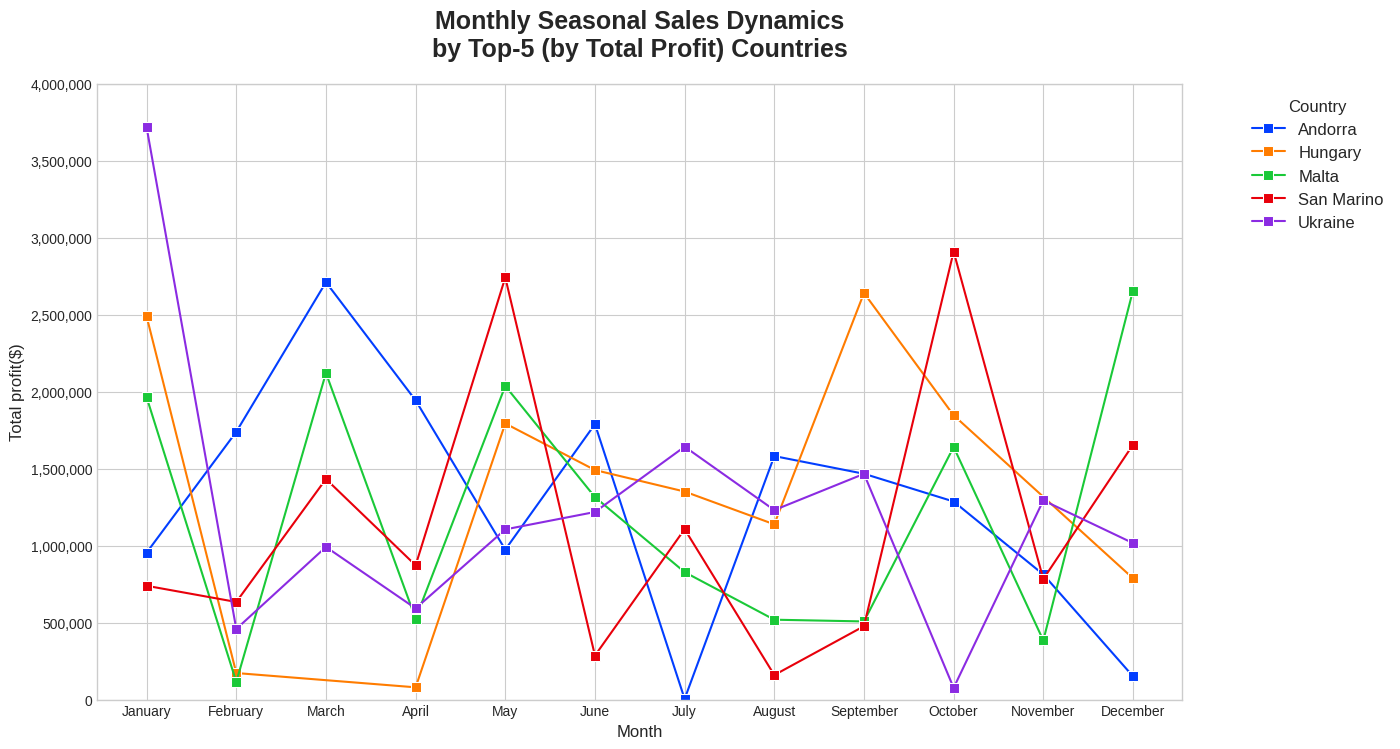

In [86]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the line plot
plt.figure(figsize=(14, 8))
ax16 = sns.lineplot(data=monthly_sales_by_country_top5, x='month', y='total_profit', hue='country_name', palette='bright', marker='s', markersize=6.5)

# Add titles and labels
plt.title('Monthly Seasonal Sales Dynamics\nby Top-5 (by Total Profit) Countries', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total profit($)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Set the Y-axis limit and ticks
plt.ylim(0, 4000000)
#ax16.yaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax16.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

The linechart shows clear seasonality across all five countries, with distinct peaks in **January, March, and May**. Andorra is one of the top countries, but every July, sales in this country are absent. This may be related to vacation specifics in the country.

**Sales dynamics by country and year**

In [87]:
# Group the data by month and product category and calculate the total revenue
#observed=True will only take into categories that are actually present in the data.
yearly_sales_by_country = company_data[company_data['country_name'] != 'UNKNOWN'].groupby(['year', 'country_name'], observed=True)['total_profit'].sum().reset_index()

# filter to include only the top 5 categories
yearly_sales_by_country_top5 = yearly_sales_by_country[yearly_sales_by_country['country_name'].isin(top_5_countries)]

print("Monthly Sales by Country")
yearly_sales_by_country_top5.head(10)

Monthly Sales by Country


year country_name  total_profit
1   2010      Andorra    3243222.41
18  2010      Hungary    3336512.67
27  2010        Malta    1547711.82
36  2010   San Marino     467794.78
43  2010      Ukraine     840103.28
46  2011      Andorra     677799.93
63  2011      Hungary    1978973.72
71  2011        Malta    3242881.30
80  2011   San Marino     699193.28
87  2011      Ukraine    3598514.69

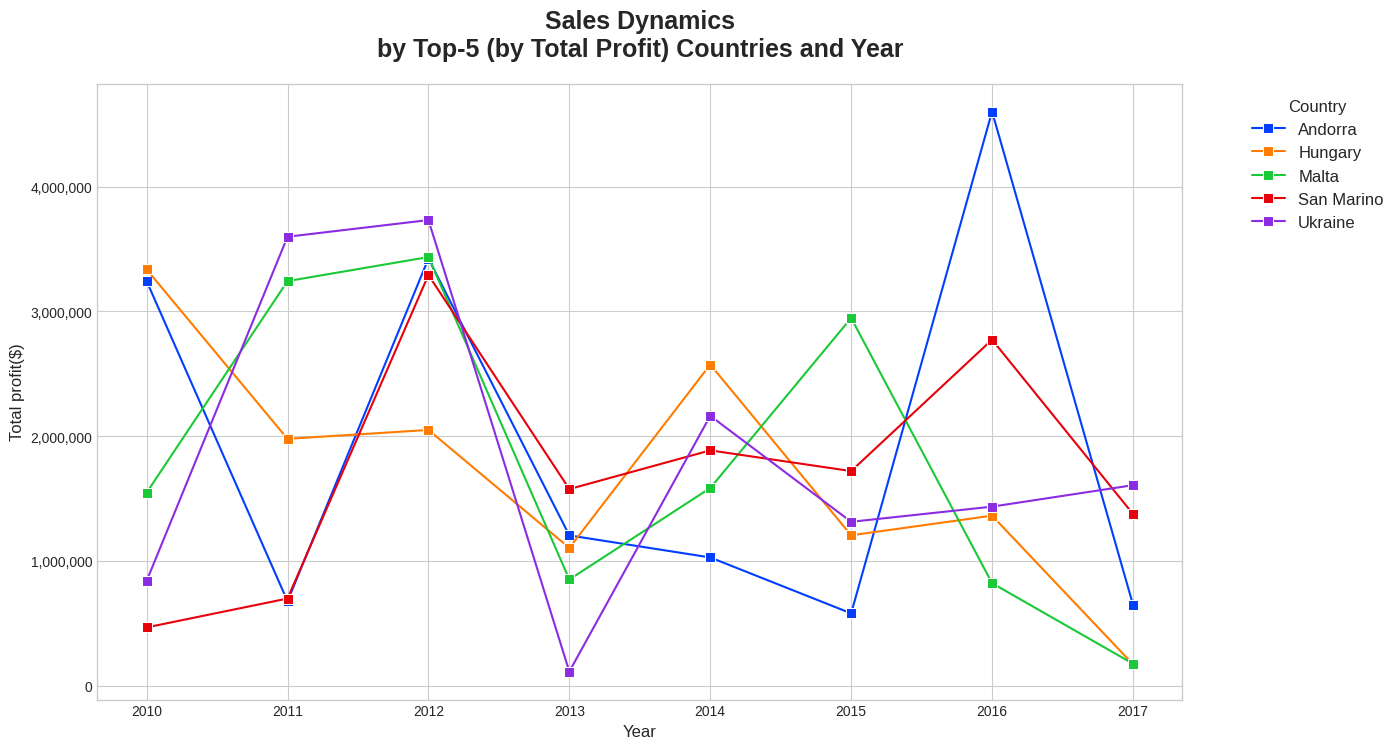

In [88]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the line plot
plt.figure(figsize=(14, 8))
ax17 = sns.lineplot(data=yearly_sales_by_country_top5, x='year', y='total_profit', hue='country_name', palette='bright', marker='s', markersize=6.5)

# Add titles and labels
plt.title('Sales Dynamics\nby Top-5 (by Total Profit) Countries and Year', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total profit($)', fontsize=12)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Set the Y-axis limit and ticks
#plt.ylim(0, 4000000)
#ax17.yaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax17.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

The top 5 countries show a trend that differs from the overall one. For instance, for **Andorra**, **2016** was the most profitable year, and **2015** was the least profitable. **Ukraine's** dynamics align with the overall trend: **2012** was the most profitable year, and **2013** was the least profitable.

### **Sales dynamics by region**

**Monthly seasonal sales dynamics by region**

In [89]:
monthly_sales_by_region = company_data[company_data['region'] != 'UNKNOWN'].groupby(['month', 'region'], observed=True)['total_profit'].sum().reset_index()

print("Monthly Sales by Region")
monthly_sales_by_region

Monthly Sales by Region


month  region  total_profit
0     January    Asia    2590926.43
1     January  Europe   47716327.16
2    February    Asia    2738447.77
3    February  Europe   34538362.76
4       March    Asia    2791492.45
5       March  Europe   44592473.06
6       April    Asia     488870.44
7       April  Europe   32850955.14
8         May    Asia    2140690.46
9         May  Europe   40381052.92
10       June    Asia    4211288.17
11       June  Europe   40390854.77
12       July    Asia    1980728.07
13       July  Europe   41293622.35
14     August    Asia    1616179.50
15     August  Europe   29788742.91
16  September    Asia    2204604.64
17  September  Europe   36836094.43
18    October    Asia     755421.91
19    October  Europe   32601711.80
20   November    Asia    1823535.67
21   November  Europe   32605739.20
22   December    Asia    1810067.44
23   December  Europe   35414449.19

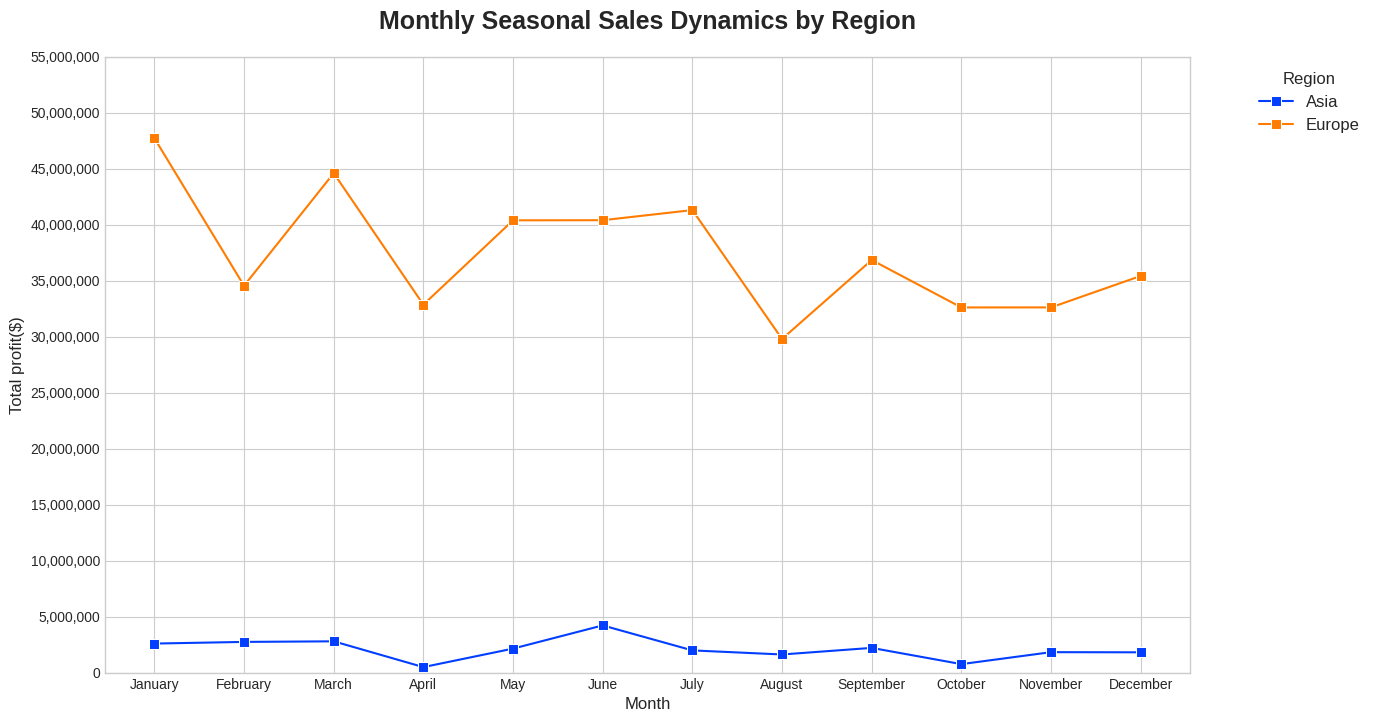

In [90]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the line plot
plt.figure(figsize=(14, 8))
ax18 = sns.lineplot(data=monthly_sales_by_region, x='month', y='total_profit', hue='region', palette='bright', marker='s', markersize=6.5)

# Add titles and labels
plt.title('Monthly Seasonal Sales Dynamics by Region', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total profit($)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Set the Y-axis limit and ticks
plt.ylim(0, 55000000)
ax18.yaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax18.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

We can observe that **Europe** maintains the general trend and significantly dominates over **Asia**. **Asia's** profit has remained quite stable throughout the entire period.

**Sales dynamics by region and year**

In [91]:
yearly_sales_by_region = company_data[company_data['region'] != 'UNKNOWN'].groupby(['year', 'region'], observed=True)['total_profit'].sum().reset_index()

print("Monthly Sales by Region")
yearly_sales_by_region

Monthly Sales by Region


year  region  total_profit
0   2010    Asia    3503181.39
1   2010  Europe   56314811.32
2   2011    Asia    1456460.18
3   2011  Europe   62910550.76
4   2012    Asia    5462681.60
5   2012  Europe   77607374.58
6   2013    Asia    3720805.55
7   2013  Europe   47501124.13
8   2014    Asia    3833480.30
9   2014  Europe   62599502.44
10  2015    Asia    3400170.30
11  2015  Europe   54826339.24
12  2016    Asia    1953883.60
13  2016  Europe   53146201.59
14  2017    Asia    1821590.03
15  2017  Europe   34104481.63

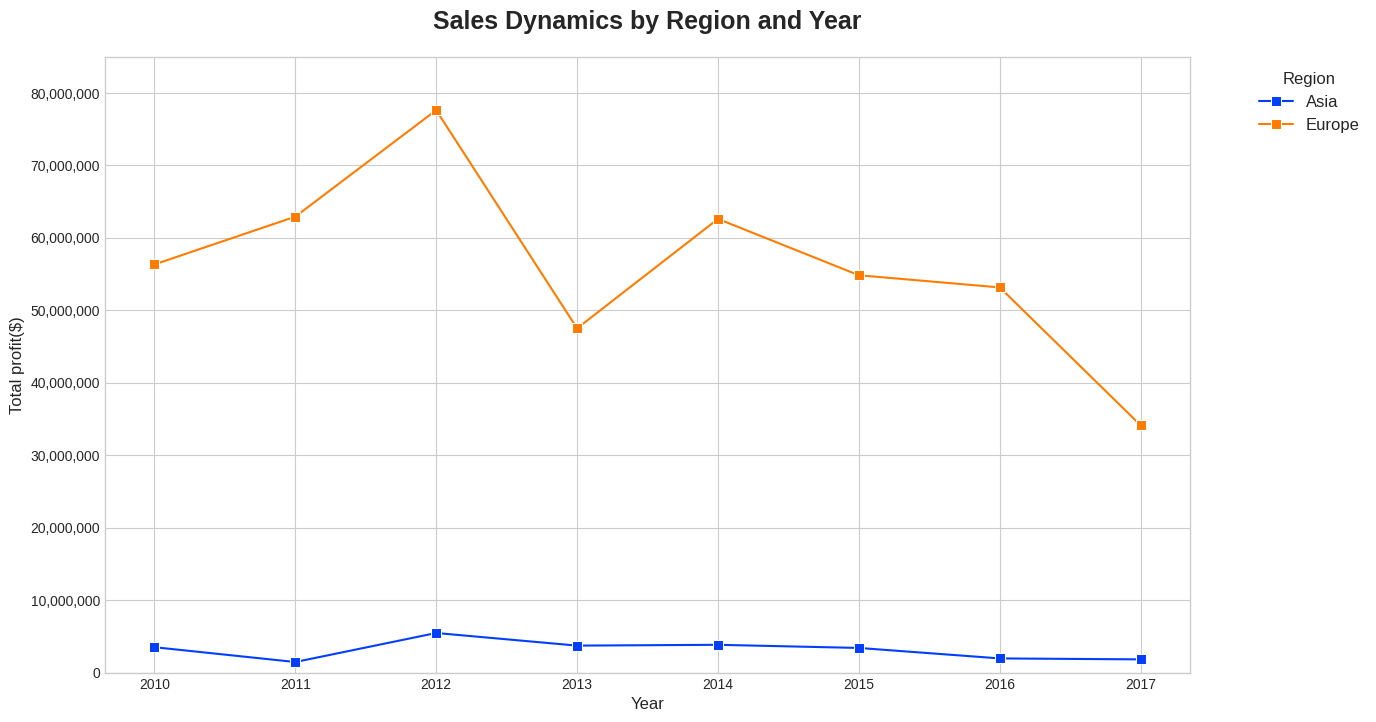

In [92]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the line plot
plt.figure(figsize=(14, 8))
ax19 = sns.lineplot(data=yearly_sales_by_region, x='year', y='total_profit', hue='region', palette='bright', marker='s', markersize=6.5)

# Add titles and labels
plt.title('Sales Dynamics by Region and Year', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total profit($)', fontsize=12)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Set the Y-axis limit and ticks
plt.ylim(0, 85000000)
#ax19.yaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax19.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

We can observe that **Europe** maintains the general trend and significantly dominates over **Asia**. **Asia's** profit has remained quite stable throughout the entire period.

## **Sales dynamics by weeday**

### **Overall sales dynamics by weeday**

In [93]:
weekday_sales = company_data.groupby(['weekday'], observed=True)['total_profit'].sum().reset_index()
print('Wekday Seasonal Sales Dynamics')
weekday_sales

Wekday Seasonal Sales Dynamics


weekday  total_profit
0     Monday   75803436.50
1    Tuesday   66077897.27
2  Wednesday   72323843.38
3   Thursday   64325663.17
4     Friday   79234529.04
5   Saturday   71435860.49
6     Sunday   72686832.73

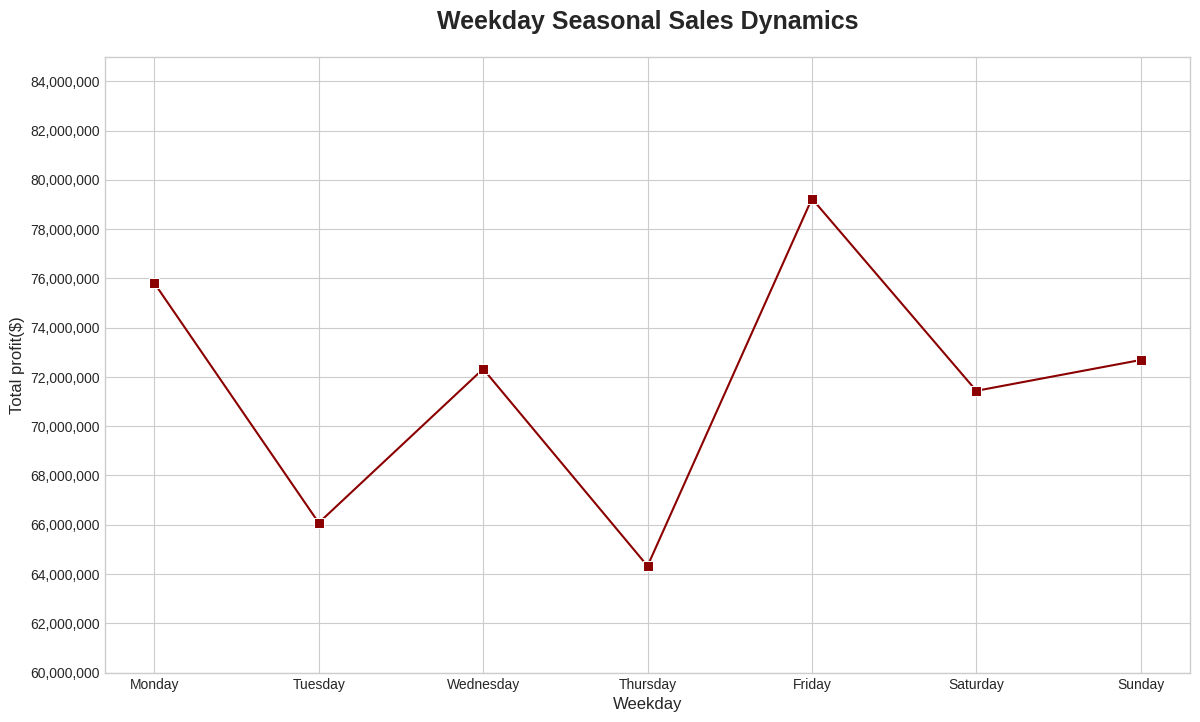

In [94]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the line plot
plt.figure(figsize=(14, 8))
ax20 = sns.lineplot(data=weekday_sales, x='weekday', y='total_profit', color='darkred', marker='s', markersize=7)

# Add titles and labels
plt.title('Weekday Seasonal Sales Dynamics', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Total profit($)', fontsize=12)

# Set the Y-axis limit and ticks
plt.ylim(60000000, 85000000)
ax20.yaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax20.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

On the line plot, seasonality by day of the week is observed, with the most profitable days being **Friday and Monday**, and the least profitable being **Thursday and Tuesday**.

### **Sales dynamics by weeday and product category**

In [95]:
weekday_sales_by_category = company_data.groupby(['weekday', 'product_category'], observed=True)['total_profit'].sum().reset_index()

# filter to include only the top 5 categories
weekday_sales_by_category_top5 = weekday_sales_by_category[weekday_sales_by_category['product_category'].isin(top_5_categories)]


print("Sales by Product Category and Weekday")
weekday_sales_by_category_top5.head(15)

Sales by Product Category and Weekday


weekday product_category  total_profit
0      Monday        Baby Food    5858292.18
3      Monday          Clothes    5001924.96
4      Monday        Cosmetics    9717246.56
6      Monday        Household   17870500.17
8      Monday  Office Supplies   11860051.25
12    Tuesday        Baby Food    8190853.56
15    Tuesday          Clothes    9124332.48
16    Tuesday        Cosmetics   14154582.83
18    Tuesday        Household    3393156.02
20    Tuesday  Office Supplies    9654716.25
24  Wednesday        Baby Food    7787187.10
27  Wednesday          Clothes    3197430.72
28  Wednesday        Cosmetics   11929220.70
30  Wednesday        Household   15837158.80
32  Wednesday  Office Supplies   11817505.00

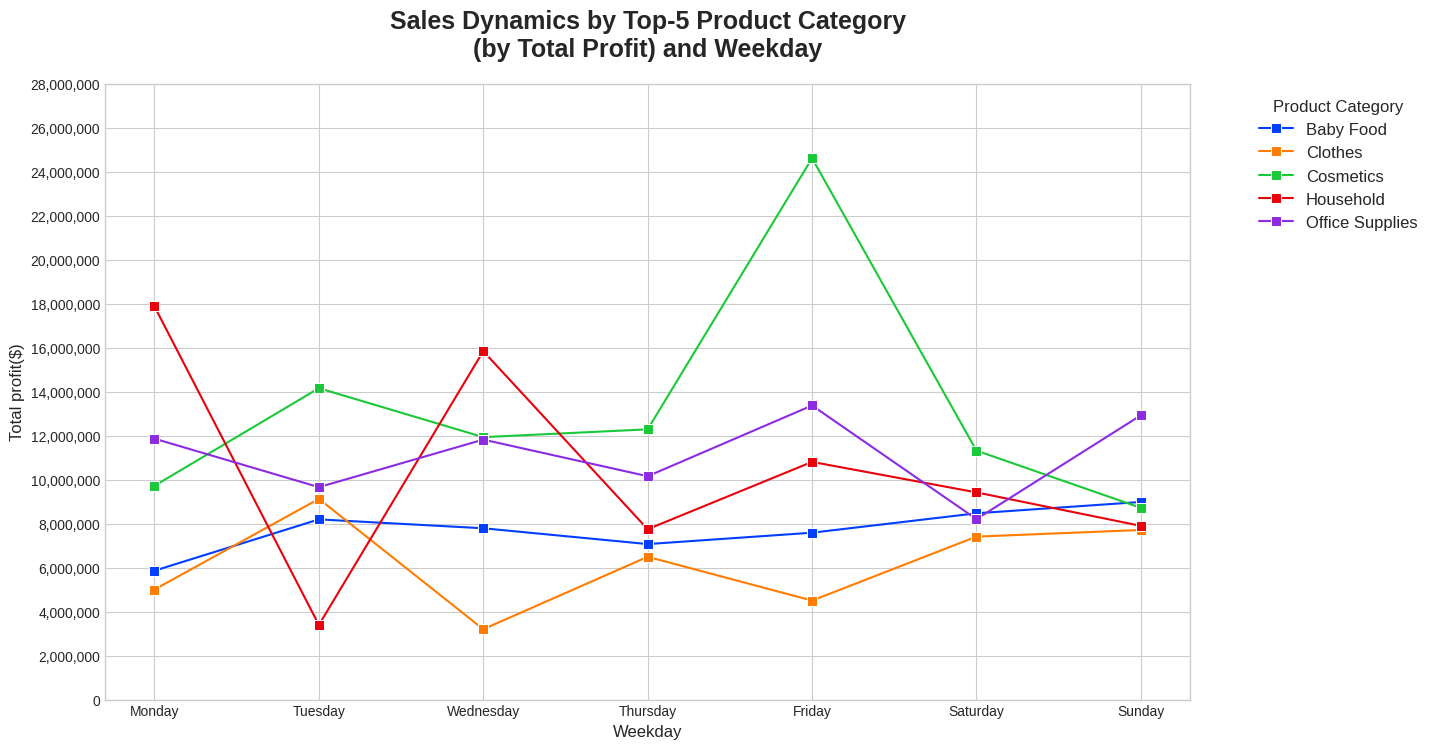

In [96]:
# Set the plot style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the line plot
plt.figure(figsize=(14, 8))
ax21 = sns.lineplot(data=weekday_sales_by_category_top5, x='weekday', y='total_profit', hue='product_category', palette='bright', marker='s', markersize=6.5)

# Add titles and labels
plt.title('Sales Dynamics by Top-5 Product Category\n(by Total Profit) and Weekday', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Total profit($)', fontsize=12)
plt.legend(title='Product Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=12)

# Set the Y-axis limit and ticks
plt.ylim(0, 28000000)
ax21.yaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax21.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

The sales dynamics for the top 5 categories by day of the week do not align with the overall trend, with the exception of the **Cosmetics** category, for which the main peak day is **Friday**. For **Household**, **Tuesday** is one of the peak days, while for the other categories, profit decreases on **Tuesday**. The remaining categories maintain relatively stable dynamics throughout the week.

# **Reporting**

## **Dashboard**

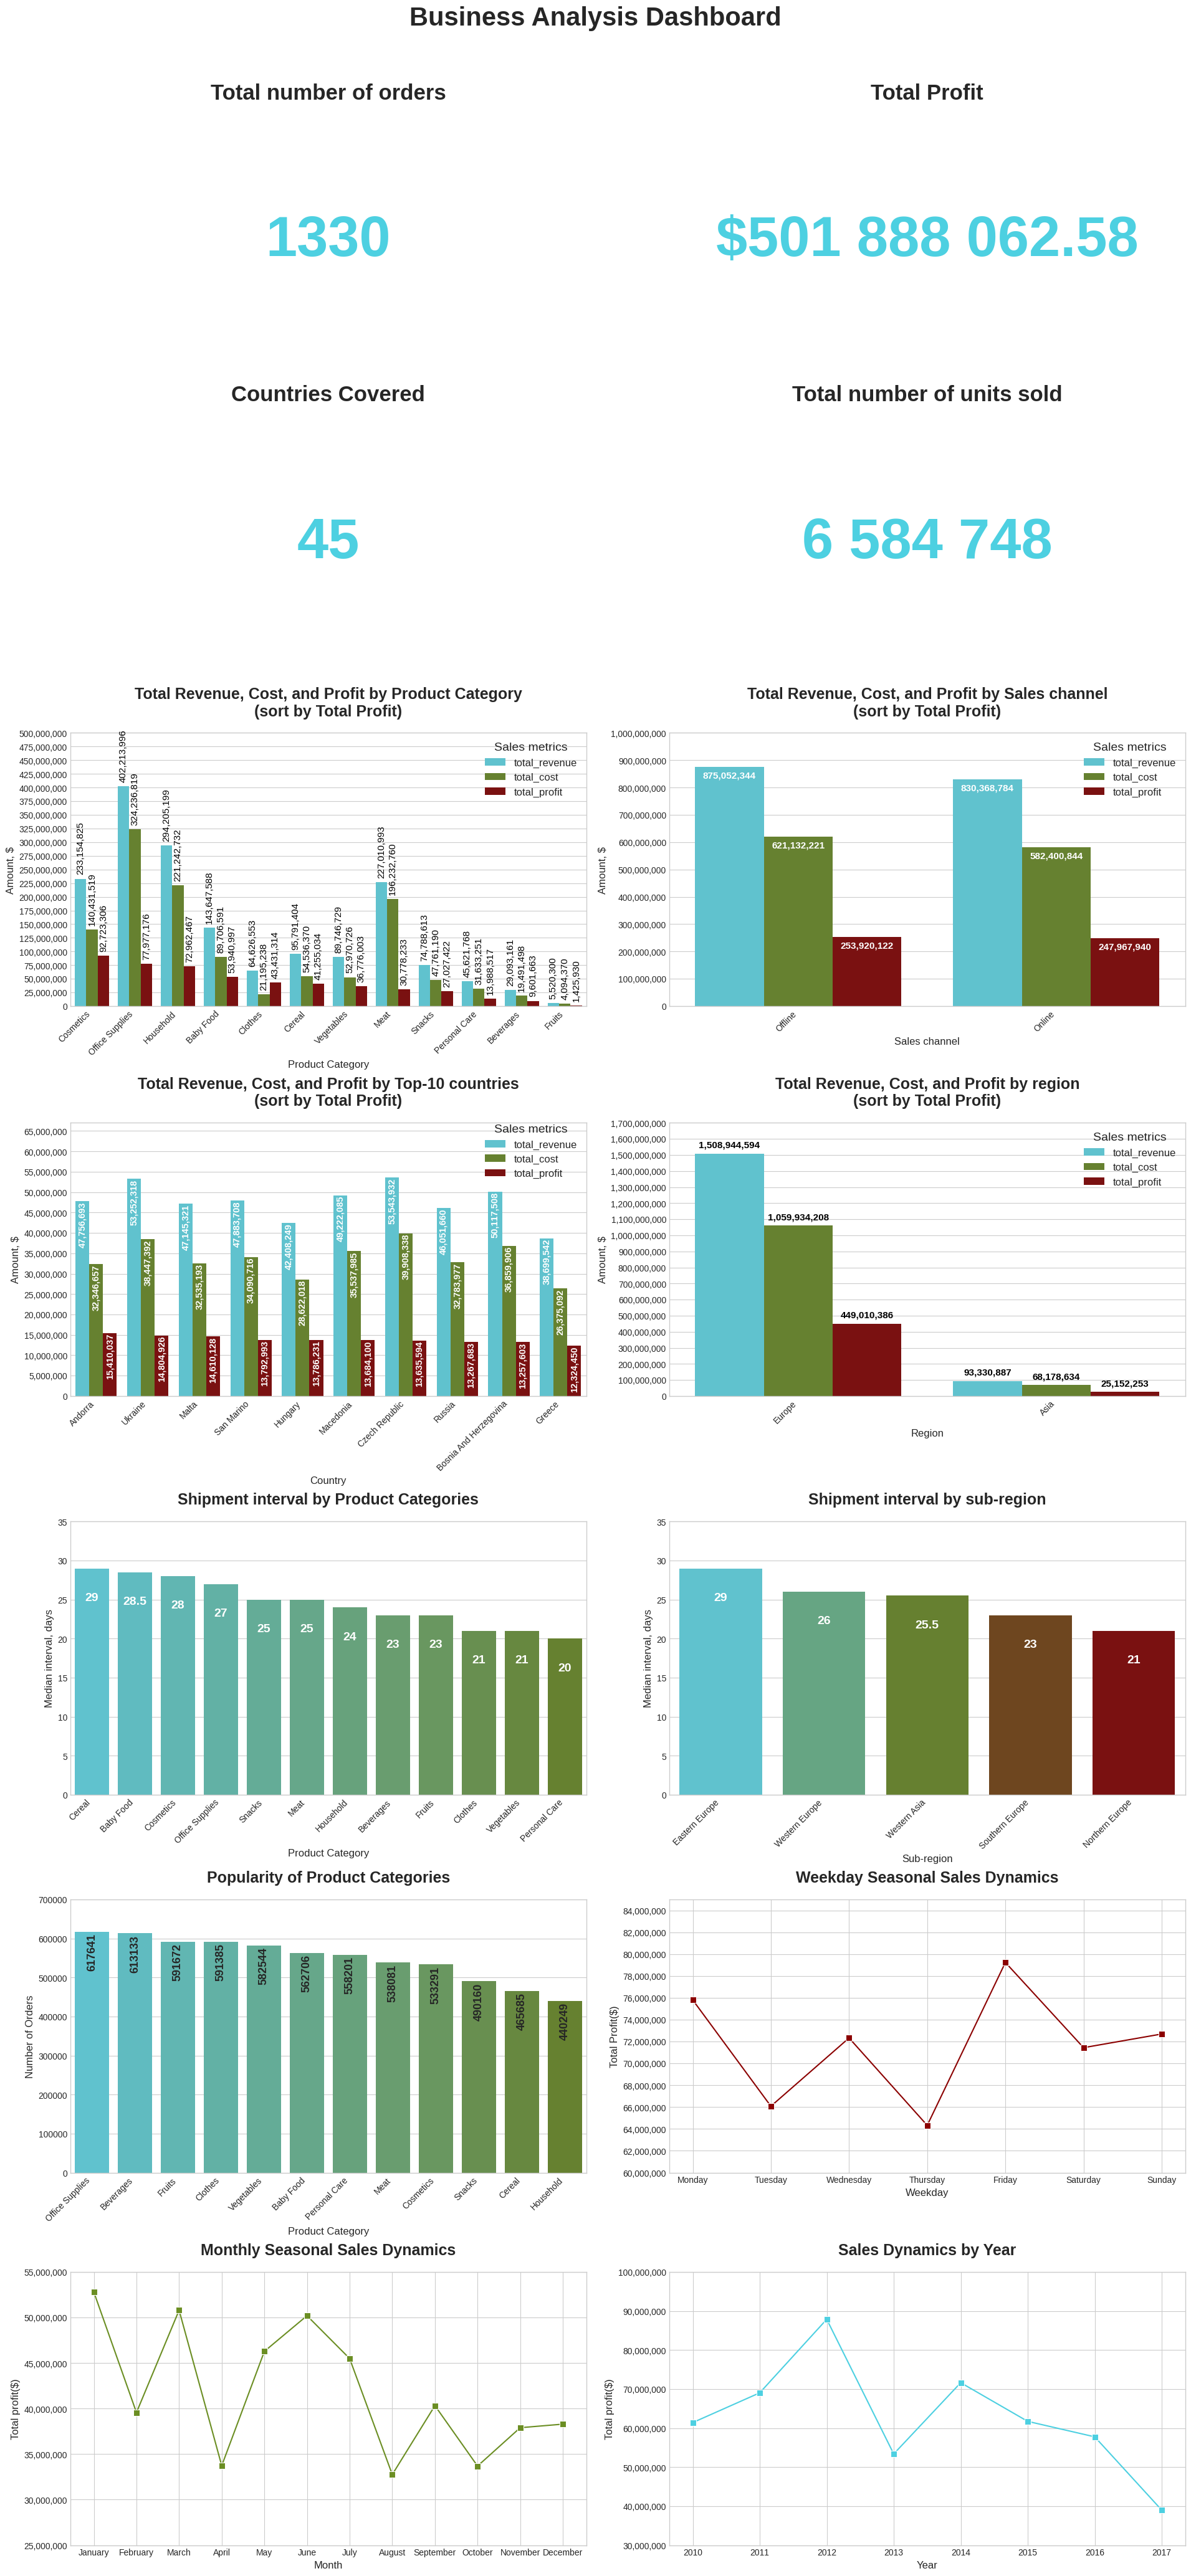

In [97]:
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(19, 40), constrained_layout=True)
axes = axes.flatten()

# 1. Total number of orders
axes[0].text(0.5, 0.5, f'{total_orders}', ha='center', va='center', fontsize=65, fontweight='bold', color='#4dd0e1')
axes[0].set_title('Total number of orders', fontsize=25, fontweight='bold')
axes[0].axis('off')

# 2. Total profit for all time
axes[1].text(0.5, 0.5, f'${total_profit:,}'.replace(',', ' '), ha='center', va='center', fontsize=65, fontweight='bold', color='#4dd0e1')
axes[1].set_title('Total Profit', fontsize=25, fontweight='bold')
axes[1].axis('off')

# 3. Total number of countries covered
axes[2].text(0.5, 0.5, f"{total_countries}", ha='center', va='center', fontsize=65, fontweight='bold', color='#4dd0e1')
axes[2].set_title('Countries Covered', fontsize=25, fontweight='bold')
axes[2].axis('off')

#4.Total number of units sold
axes[3].text(0.5, 0.5, f'{numb_units_sold:,}'.replace(',', ' '), ha='center', va='center', fontsize=65, fontweight='bold', color='#4dd0e1')
axes[3].set_title('Total number of units sold', fontsize=25, fontweight='bold')
axes[3].axis('off')


# 5. Total Revenue, Cost, and Profit by Product Category
colors111 = ['#4dd0e1', 'olivedrab', 'darkred']

ax22 = sns.barplot(data=company_metrics_long, x='product_category', y='Amount, $', hue='Sales metric', palette=colors111, ax=axes[4])

ax22.set_title('Total Revenue, Cost, and Profit by Product Category\n(sort by Total Profit)', fontsize=18, fontweight='bold', pad=20)
ax22.set_xlabel('Product Category', fontsize=12)
ax22.set_ylabel('Amount, $', fontsize=12)
ax22.tick_params(axis='x', rotation=45)
for label in ax22.get_xticklabels():
    label.set_ha('right')
ax22.legend(title='Sales metrics', fontsize=12, title_fontsize=14)
ax22.yaxis.set_major_locator(ticker.MultipleLocator(25000000))
ax22.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax22.set_ylim(0, 500000000)
for container in ax22.containers:
    ax22.bar_label(container, padding=5, fontsize=11, rotation=90, color='black', fmt='{:,.0f}')


# 6. Total Revenue, Cost, and Profit by Sales channel\n(sort by Total Profit)
colors115 = ['#4dd0e1', 'olivedrab', 'darkred']

ax28 = sns.barplot(data=company_metrics_long_by_channel, x='sales_channel', y='Amount, $', hue='Sales metric', palette=colors115, ax=axes[5])

ax28.set_title('Total Revenue, Cost, and Profit by Sales channel\n(sort by Total Profit)', fontsize=18, fontweight='bold', pad=20)
ax28.set_xlabel('Sales channel', fontsize=12)
ax28.set_ylabel('Amount, $', fontsize=12)
ax28.tick_params(axis='x', rotation=45)
for label in ax28.get_xticklabels():
    label.set_ha('right')
ax28.legend(title='Sales metrics', fontsize=12, title_fontsize=14)
ax28.yaxis.set_major_locator(ticker.MultipleLocator(100000000))
ax28.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax28.set_ylim(0, 1000000000)

# add data labels inside the bars
for container in ax28.containers:
    ax28.bar_label(container, padding=-15, fontsize=11, fontweight='bold', rotation=0, color='white', fmt='{:,.0f}')


#7 Total Revenue, Cost, and Profit by Top-10 countries\n(sort by Total Profit
colors112 = ['#4dd0e1', 'olivedrab', 'darkred']

ax24 = sns.barplot(data=company_metrics_by_country_long, x='country_name', y='Amount, $', hue='Sales metric', palette=colors112, ax=axes[6])

ax24.set_title('Total Revenue, Cost, and Profit by Top-10 countries\n(sort by Total Profit)', fontsize=18, fontweight='bold', pad=20)
ax24.set_xlabel('Country', fontsize=12)
ax24.set_ylabel('Amount, $', fontsize=12)
ax24.tick_params(axis='x', rotation=45)
for label in ax24.get_xticklabels():
    label.set_ha('right')
ax24.legend(title='Sales metrics', fontsize=12, title_fontsize=14, loc='upper right', bbox_to_anchor=(1, 1.03))
ax24.yaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax24.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax24.set_ylim(0, 67000000)
for container in ax24.containers:
    ax24.bar_label(container, padding=-53, fontsize=10.5, fontweight='bold', rotation=90, color='w', fmt='{:,.0f}')

#8 Total Revenue, Cost, and Profit by region\n(sort by Total Profit)
colors113 = ['#4dd0e1', 'olivedrab', 'darkred']

ax25 = sns.barplot(data=company_metrics_long_by_region, x='region', y='Amount, $', hue='Sales metric', palette=colors113, ax=axes[7])

ax25.set_title('Total Revenue, Cost, and Profit by region\n(sort by Total Profit)', fontsize=18, fontweight='bold', pad=20)
ax25.set_xlabel('Region', fontsize=12)
ax25.set_ylabel('Amount, $', fontsize=12)
ax25.tick_params(axis='x', rotation=45)
for label in ax25.get_xticklabels():
    label.set_ha('right')
ax25.legend(title='Sales metrics', fontsize=12, title_fontsize=14)
ax25.yaxis.set_major_locator(ticker.MultipleLocator(100000000))
ax25.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax25.set_ylim(0, 1700000000)
for container in ax25.containers:
    ax25.bar_label(container, padding=5, fontsize=11, fontweight='bold', rotation=0, color='black', fmt='{:,.0f}')

#9 Shipment interval by Product Categories
gradient_colors112 = sns.color_palette(f"blend:#4dd0e1,olivedrab", len(product_category_interval))

ax26 = sns.barplot(x=product_category_interval.index, y=product_category_interval.values, hue=product_category_interval.index, palette=gradient_colors112, legend=False, ax=axes[8])

ax26.set_ylim(0, 35)
ax26.set_title('Shipment interval by Product Categories', fontsize=18, fontweight='bold', pad=20)
ax26.set_xlabel('Product Category', fontsize=12)
ax26.set_ylabel('Median interval, days', fontsize=12)
ax26.tick_params(axis='x', rotation=45)
for label in ax26.get_xticklabels():
    label.set_ha('right')
for container in ax26.containers:
    ax26.bar_label(container, padding=-40, fontsize=14, fontweight='bold', rotation=0, color='white')


#10 Shipment interval by sub-region
gradient_colors115 = sns.color_palette(f"blend:#4dd0e1,olivedrab,darkred", len(sub_region_interval))

ax27 = sns.barplot(x=sub_region_interval.index, y=sub_region_interval.values, hue=sub_region_interval.index, palette=gradient_colors115, legend=False, ax=axes[9])

ax27.set_ylim(0, 35)
ax27.set_title('Shipment interval by sub-region', fontsize=18, fontweight='bold', pad=20)
ax27.set_xlabel('Sub-region', fontsize=12)
ax27.set_ylabel('Median interval, days', fontsize=12)
ax27.tick_params(axis='x', rotation=45)
for label in ax27.get_xticklabels():
    label.set_ha('right')

for container in ax27.containers:
    ax27.bar_label(container, padding=-40, fontsize=14, fontweight='bold', rotation=0, color='white')

#11 Popularity of Product Categories
gradient_colors111 = sns.color_palette(f"blend:#4dd0e1,olivedrab", len(product_popularity))

ax23 = sns.barplot(x=product_popularity.index, y=product_popularity.values, hue=product_popularity.index, palette=gradient_colors111, legend=False, ax=axes[10])

ax23.set_title('Popularity of Product Categories', fontsize=18, fontweight='bold', pad=20)
ax23.set_xlabel('Product Category', fontsize=12)
ax23.set_ylabel('Number of Orders', fontsize=12)
ax23.tick_params(axis='x', rotation=45)
for label in ax23.get_xticklabels():
    label.set_ha('right')
ax23.set_ylim(0, 700000)
for container in ax23.containers:
    ax23.bar_label(container, padding=-45, fontsize=13, fontweight='bold', rotation=90)


#12 Weekday Seasonal Sales Dynamics
ax29 = sns.lineplot(data=weekday_sales, x='weekday', y='total_profit', color='darkred', marker='s', markersize=7, ax=axes[11])

ax29.set_title('Weekday Seasonal Sales Dynamics', fontsize=18, fontweight='bold', pad=20)
ax29.set_xlabel('Weekday', fontsize=12)
ax29.set_ylabel('Total Profit($)', fontsize=12)
ax29.set_ylim(60000000, 85000000)
ax29.yaxis.set_major_locator(ticker.MultipleLocator(2000000))
ax29.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


#13 Monthly Seasonal Sales Dynamics
ax30 = sns.lineplot(data=monthly_sales, x='month', y='total_profit', color='olivedrab', marker='s', markersize=7,  ax=axes[12])

ax30.set_title('Monthly Seasonal Sales Dynamics', fontsize=18, fontweight='bold', pad=20)
ax30.set_xlabel('Month', fontsize=12)
ax30.set_ylabel('Total profit($)', fontsize=12)
ax30.set_ylim(25000000, 55000000)
#ax30.yaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax30.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


#14
ax31 = sns.lineplot(data=yearly_sales, x='year', y='total_profit', color='#4dd0e1', marker='s', markersize=7, ax=axes[13])

ax31.set_title('Sales Dynamics by Year', fontsize=18, fontweight='bold', pad=20)
ax31.set_xlabel('Year', fontsize=12)
ax31.set_ylabel('Total profit($)', fontsize=12)
ax31.set_ylim(30000000, 100000000)
#ax31.yaxis.set_major_locator(ticker.MultipleLocator(5000000))
ax31.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))


#------

fig.suptitle('Business Analysis Dashboard', fontsize=30,  fontweight='bold', y=1.03)
#fig.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


## **Conclusions**

### **Conclusions**

The work was aimed at analyzing the performance of a certain company, which is represented in the markets of **45** countries (mainly in **Europe**). Its assortment includes **12** product categories. The main performance indicators of the company for the entire period:

* Total revenue: **\$1,705,421,127.89**

* Total cost: **\$1,203,533,065.31**

* Total profit: **\$501,888,062.58**

* Total number of orders: **1330**

The distribution of sales by product categories was as follows:

* Top categories by total revenue and profit: **Cosmetics (profit \$92,723,306), Office Supplies (profit \$77,977,176), Household (profit \$72,962,467)**

* Categories with the lowest revenue and profit: **Personal Care (profit \$13,988,517), Beverages (profit \$9,601,663), Fruits (\$1,425,930)**

At the same time, the most popular categories by the number of ordered units were **Office Supplies, Beverages, Fruits.** The least popular categories: **Snacks, Cereal, Household.** This indicates that the most popular categories are not the main source of profit, although they have a larger number of orders, which means they require more effort to process.

The main market for the company is **Europe**, with partial representation in **Asia**. In terms of subregions, **Southern Europe** dominates. The highest profit was observed in such countries as **Andorra, Malta, Ukraine, and San Marino.** In the leading profit countries (**Andorra, Malta, Ukraine**) the most popular categories are: **Cosmetics** (for all 3 leading countries), **Office Supplies, Cereal** (for Ukraine), **Household, Beverages** (for Andorra), **Fruits and Baby Food** (for Malta).

**Offline channel** and **online channel** are approximately equal in terms of total profit. For the **offline channel** the most popular categories are **Office Supplies, Baby Food, and Clothes.** For the **online channel** the popular categories are **Beverages, Fruits, and Vegetables.**

The delivery interval ranged on average from 20 to 29 days depending on the category, with the category requiring the longest delivery time being **Cereal**, and the shortest delivery time being **Personal Care.**
By countries, the average delivery time ranged from **12.5 days (for Croatia)** to **36 days (for Hungary).**

From the beginning of the analysis (**since 2010**) until **2012**, there was an increase in total profit, followed by a **sharp decline in 2013.** In **2014**, the profit returned to the initial values, after which in recent years there was a decline. This may indicate additional unaccounted factors that require further in-depth analysis.
The most profitable months are **January and March**, the least profitable months are **April and August**. During the week, profit increases on **Friday and Monday**, and decreases on **Tuesday and Thursday.**

**Possible recommendations for further company development:**

It is advisable to focus on profitable products such as **Cosmetics, Office Supplies, Household.** Ensure their promotion and increase their popularity. It is worth reviewing the work with products that have high popularity but low profitability (categories **Beverages and Fruits**) and try to increase their margin, since the efforts spent on these categories do not justify themselves as much as in higher-profit categories.
Attention should be paid to seasonality, in order to prepare in advance for peak months (**January, March**) and develop strategies to mitigate declines in other months.
From a geographical perspective, marketing efforts should be focused on key countries (**Andorra, Malta, Ukraine**), where the company already has success. For markets with low profitability, additional analysis is required to improve profitability. It is also possible to consider a strategy of expansion into other regions with untapped potential, or conversely, exiting some unpromising markets to free up resources.

### **Висновки**

Робота була спрямована на аналіз роботи певної компанії, яка представлена на ринках **45** країн (переважно в **Європі**). В своєму асортименті має **12** категорій товарів. Основні показники роботи компанії за весь час:

* Загальний дохід: **\$1 705 421 127.89**

* Загальний росхід: **\$1 203 533 065.31**

* Загальний прибуток: **\$501 888 062.58**

* Загальна кількість замовлень: **1330**

Розподіл продажів за категоріями товарів був таким:
* Топові категорії за загальним доходом та прибутком: **Cosmetics (прибуток \$92 723 306), Office Supplies (прибуток \$77 977 176), Household (прибуток \$72 962 467)**

* Категорії з найменшим доходом та прибутком: **Personal Care (прибуток \$13 988 517), Beverages (прибуток \$9 601 663), Fruits (\$1 425 930)**

При цьому найбільш популярними категоріями по кількості замовлених одиниць були **Office Supplies, Beverages, Fruits.** Найменш популярні категорії: **Snacks, Cereal, Household.** Це говорить про те, що найбільш популярні категорії не є основним джерелом прибутку, хоча і мають більшу кількість замовлень, а значить і потребують більше зусиль на обробку цих замовлень.

Основним ринком для компанії є країни **Європи**, частково також компанія представлена в **Азії**. У розрізі субрегіонів домінує **Південна Європа**. Найбільший прибуток спостерігався у таких країнах, як  **Андорра, Мальта, Україна та Сан-Марино**.  В країнах-лідерах за прибутком (**Андорра, Мальта, Україна**) найбільш популярними є такі категорії, як: **Cosmetics** (для всих 3 країн лідерів), **Office Supplies, Cereal** (для України), **Household**, **Beverages**  (для Андори), **Fruits та Baby Food** (для Мальти).

**Офлайн-канал** та **онлайн-канал** приблизно рівнозначними за загальним прибутком. Для **офлайн-канал** найбільш популярними категоріями є O**ffice Supplies, Baby Food та Clothes**. Для **онлайн-каналу** популярні категорії - це **Beverages, Fruits та Vegetables.**

Інтервал доставки коливався в середньому від 20 до 29 днів в залежності від категорії, при цьому категорія, яка потребувала найбільший час для доставки це **Cereal**, найменший час доставки - **Personal Care.**
По країнам середній час доставки складав від **12,5 днів (для Хорватії)**, до **36 днів (для Угорщини)**.

Від початку аналізу (**з 2010 р.**) і до **2012** року відбувалося зпростання загального прибутку, після чого відбулося **стрімке падіння у 2013** році. У **2014** році прибуток повернувся до початкових значень, після чого в останні роки відбувалося зниження. Це може свідчити про додаткові невраховані фактори, що потребує поглибленого аналізу.
Найбільш прибутковими місяцями є **січень та березень**, найменш прибутковими - **квітень та серпень**, протягом тижня зріст прибутку відбувається в **п'ятницю та понеділок**, зниження у **вівторок та четвер**.


**Можливі рекомендації щодо подальшого розвитку компанії:**

Варто зосередити увагу на прибуткових товарах, таких категорій, як **Cosmetics, Office Supplies, Household**. Забезпечити їх просування та збільшення популярності. Варто переглянути роботу з товарами, які мають високу популярність, але низький прибуток (категорії **Beverages and Fruits**),  спробувати збільшити їх маржинальність, адже зусилля, витрачення на роботу з цими категоріями, не виправдовують себе так, як у категоріях з більшим прибутком.
Варто звернути увагу на сезонність, щоб заздалегідь готуватися до пікових місяців (**січень, березень**) і розробляти стратегії для зниження спадів в інші місяці.
З географічної точки зору варто зосереджувати маркетингові зусилля на ключових країнах (**Андора, Мальта, Україна**), де компанія вже має успіх. Для ринків з низьким прибутком необхідно провести додатковий аналіз для покращення прибутковості. Можна розглянути стратегію розширення на інші регіони, які мають нереалізований потенціал, або навпаки виходу з деяких неперспективних ринків для вивільнення ресурсів.